<a href="https://colab.research.google.com/github/SqweeksOp/my_hack/blob/main/ADS_training_Distributor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
path="/content/drive/MyDrive/Project_data/ADS_policy/Distributor/Train/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/ADS_policy/Distributor/Train"):
    if filename.endswith(".csv"):
      if count==0:
        df1=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df1=df1.append(df)
      if count==2000:
        break
      count+=1
print(count)

Loading Data...
2000


In [6]:
import os
path="/content/drive/MyDrive/Project_data/ADS_policy/Distributor/Test/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/ADS_policy/Distributor/Test"):
    if filename.endswith(".csv"):
      if count==0:
        df_test=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df_test=df_test.append(df)
      if count==500:
        break
      count+=1
print(count)

Loading Data...
499


In [7]:
df1.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,69.0,69.0,69.0,131.0,0.0,131.0,69.0,69.0,0.0,0.0
4,4.0,0.0,131.0,131.0,70.0,69.0,70.0,61.0,69.0,130.0,69.0,69.0,0.0,0.0


In [8]:
df_test.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,79.0,79.0,79.0,121.0,0.0,121.0,79.0,79.0,0.0,0.0
4,4.0,0.0,121.0,121.0,82.0,79.0,82.0,39.0,79.0,118.0,80.0,80.0,0.0,0.0


In [9]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [10]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

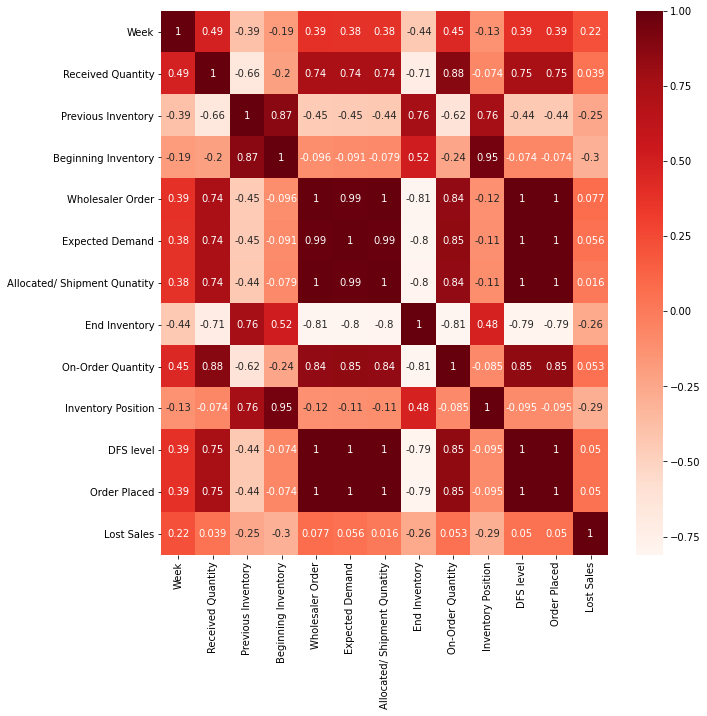

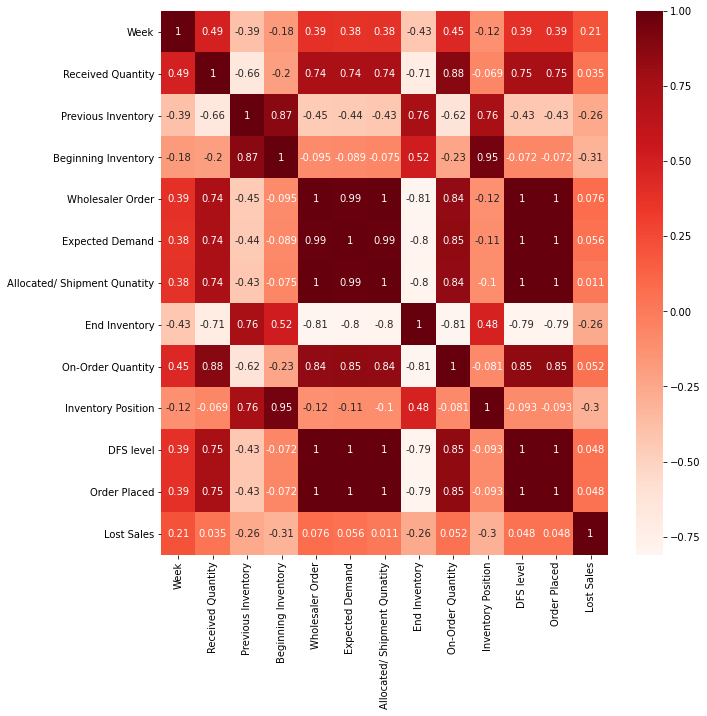

In [11]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [13]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )


In [14]:
X_train.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,End Inventory,On-Order Quantity,Inventory Position,Lost Sales
0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
2,2.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
3,3.0,0.0,200.0,200.0,69.0,131.0,0.0,131.0,0.0
4,4.0,0.0,131.0,131.0,70.0,61.0,69.0,130.0,0.0


In [15]:
X_train.shape

(104052, 9)

In [16]:
X_test.shape

(25948, 9)

- Correlation


In [17]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8145 (7.83% of total)



In [18]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 25948
    Positive: 2191 (8.44% of total)



In [19]:
!pip install imbalanced-learn

In [20]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [22]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95907, 1: 8145})


Counter({0: 23757, 1: 2191})

OVER and Under Sampling pipeline

OVER SAMPLING

In [23]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.30)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95907, 1: 28772})


UNDER SAMPLING

In [24]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 28772, 1: 28772})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

,0
57534,1
57535,1
57536,1
57537,1
57538,1
57539,1
57540,1
57541,1
57542,1
57543,1


In [26]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

,0,1,2,3,4,5,6,7,8
57514,30.889566,77.000000,8.036811,85.036811,77.963189,7.073623,76.963189,84.036811,0.000000
57515,45.685254,77.000000,0.000000,77.000000,85.000000,0.000000,80.000000,80.000000,8.000000
57516,20.000000,76.000000,9.582436,85.582436,78.582436,7.000000,76.291218,83.291218,0.000000
57517,33.000000,75.000000,0.000000,75.000000,75.000000,0.000000,78.000000,78.000000,0.000000
57518,42.259521,73.000000,0.000000,73.000000,76.000000,0.000000,75.000000,75.000000,3.000000
57519,49.000000,77.000000,0.000000,77.000000,79.000000,0.000000,80.551094,80.551094,2.000000
57520,22.000000,76.000000,1.377009,77.377009,76.377009,1.000000,75.000000,76.000000,0.000000
57521,30.684749,75.000000,0.000000,75.000000,80.000000,0.000000,78.000000,78.000000,5.000000
57522,28.088284,75.000000,1.000000,76.000000,74.911716,1.088284,74.911716,76.000000,0.000000
57523,33.000000,78.000000,0.000000,78.000000,81.478270,0.000000,78.000000,78.000000,3.478270


In [27]:
X_train.shape

(57544, 9)

In [28]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 57544
    Positive: 28772 (50.00% of total)



In [31]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [32]:
train_df.shape

(43158, 9)

In [33]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 43158
    Positive: 21528 (49.88% of total)



In [34]:
a=pd.DataFrame(bool_train_labels)
a.shape

(43158, 1)

In [35]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (43158,)
Validation labels shape: (14386,)
Test labels shape: (25948,)
Training features shape: (43158, 9)
Validation features shape: (14386, 9)
Test features shape: (25948, 9)


In [36]:
from sklearn.decomposition import PCA

In [37]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [38]:
var_ratio

{2: 0.7874098974061245,
 3: 0.877324039469545,
 4: 0.9457201860784717,
 5: 0.9793678327950336,
 6: 0.9913658738520996,
 7: 0.999998296858761,
 8: 0.9999999921366824,
 9: 0.9999999999999999}

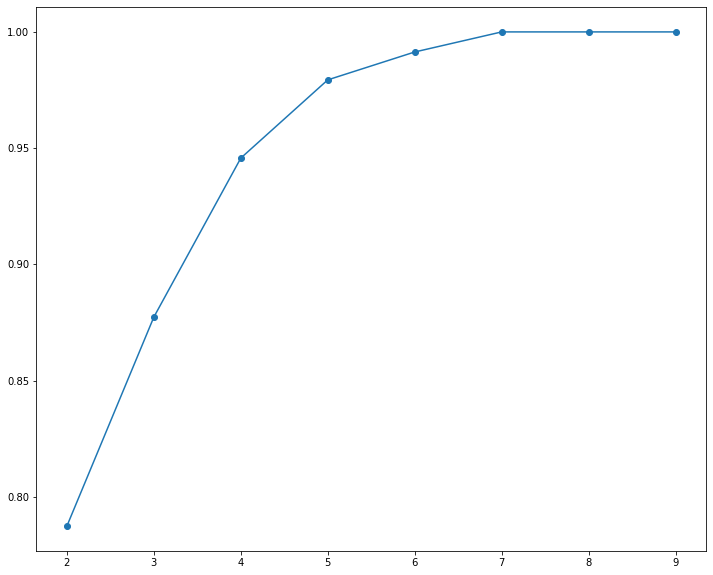

In [39]:
pd.Series(var_ratio).plot(marker="o")

In [40]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.63587799, -0.47527962, -0.98565348,  0.97154293, -0.07419569,
        -0.02912223],
       [ 2.89743272,  0.27863465, -0.31416451,  1.77128622,  2.87963019,
         2.29688562],
       [-1.49258516,  0.53371443,  0.22722602, -0.61105944,  0.138107  ,
         0.08584193],
       ...,
       [-1.53206744,  1.12294751,  0.91729074,  0.15662124, -0.05873037,
         0.03776629],
       [-0.65532861, -0.07584446, -0.32178083, -0.77164827,  0.4461859 ,
        -0.09998787],
       [-1.33036886,  0.4459413 , -0.23609875, -0.64656456,  0.2198816 ,
        -0.03366034]])

In [41]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [42]:
train_features=pd.DataFrame(train_features)
train_features

,0,1,2,3,4,5
0,0.635878,-0.475280,-0.985653,0.971543,-0.074196,-0.029122
1,2.897433,0.278635,-0.314165,1.771286,2.879630,2.296886
2,-1.492585,0.533714,0.227226,-0.611059,0.138107,0.085842
3,1.232209,-0.779302,-0.861126,1.059244,-0.371356,0.008258
4,2.313679,-2.367677,0.488082,0.087478,-0.553427,0.080310
...,...,...,...,...,...,...
43153,-0.674036,0.507730,-1.429807,0.622268,0.083032,-0.146558
43154,-0.480918,0.196719,-1.067101,0.244896,0.035033,0.041340
43155,-1.532067,1.122948,0.917291,0.156621,-0.058730,0.037766
43156,-0.655329,-0.075844,-0.321781,-0.771648,0.446186,-0.099988


In [43]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [44]:
pos_df.shape

(21528, 6)

In [45]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [46]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [47]:
val_features.shape

(14386, 1, 6)

In [48]:
test_features.shape

(25948, 1, 6)

In [49]:
train_features.shape

(43158, 1, 6)

In [50]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout

In [51]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.LSTM(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.LSTM(30,activation ="relu"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [52]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [53]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 30)             4440      
_________________________________________________________________
dropout (Dropout)            (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,791
Trainable params: 11,791
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.predict(train_features[:10])

array([[0.31372365],
       [0.31080246],
       [0.3137533 ],
       [0.31359828],
       [0.31286842],
       [0.31248388],
       [0.31349346],
       [0.31339884],
       [0.3142216 ],
       [0.31336153]], dtype=float32)

In [55]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7660


In [56]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00472683])

In [57]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.49700853],
       [0.48814368],
       [0.49663517],
       [0.49623019],
       [0.49821538],
       [0.49990454],
       [0.49760205],
       [0.49868244],
       [0.49830848],
       [0.49688548]], dtype=float32)

In [58]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6930


In [59]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [60]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [61]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [62]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [63]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

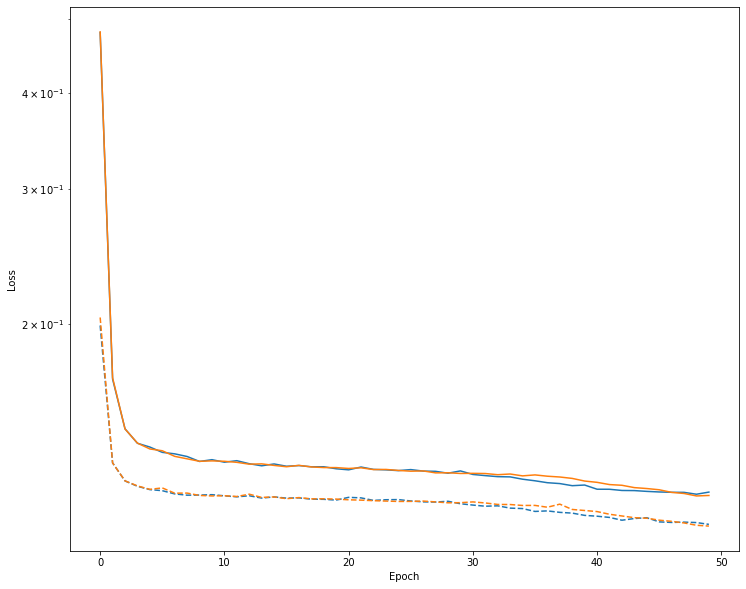

In [64]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [65]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
169/169 [==============================] - 7s 13ms/step - loss: 0.6148 - tp: 15830.3412 - fp: 1330.3765 - tn: 16798.4353 - fn: 2312.0941 - accuracy: 0.8974 - precision: 0.9270 - recall: 0.8635 - auc: 0.9611 - val_loss: 0.2008 - val_tp: 7154.0000 - val_fp: 722.0000 - val_tn: 6420.0000 - val_fn: 90.0000 - val_accuracy: 0.9436 - val_precision: 0.9083 - val_recall: 0.9876 - val_auc: 0.9761
Epoch 2/150
169/169 [==============================] - 1s 6ms/step - loss: 0.1858 - tp: 10743.5471 - fp: 946.6235 - tn: 10028.6824 - fn: 166.3941 - accuracy: 0.9466 - precision: 0.9146 - recall: 0.9843 - auc: 0.9744 - val_loss: 0.1325 - val_tp: 7159.0000 - val_fp: 471.0000 - val_tn: 6671.0000 - val_fn: 85.0000 - val_accuracy: 0.9614 - val_precision: 0.9383 - val_recall: 0.9883 - val_auc: 0.9822
Epoch 3/150
169/169 [==============================] - 1s 7ms/step - loss: 0.1425 - tp: 10718.6706 - fp: 786.7824 - tn: 10180.5412 - fn: 199.2529 - accuracy: 0.9555 - precision: 0.9322 - recall: 0.9821

In [66]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

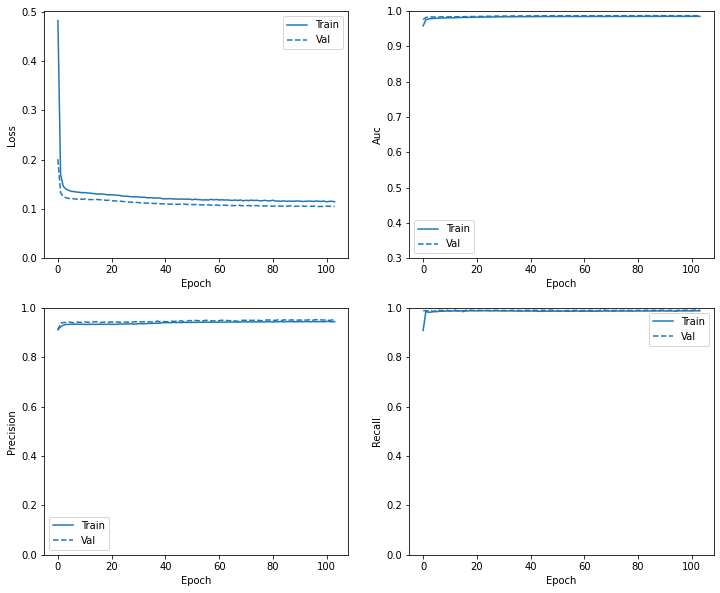

In [67]:
plot_metrics(baseline_history)

In [68]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [69]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.13488495349884033
tp :  2144.0
fp :  1260.0
tn :  22497.0
fn :  47.0
accuracy :  0.9496300220489502
precision :  0.6298472285270691
recall :  0.9785485863685608
auc :  0.98710036277771

(True Negatives):  22497
 (False Positives):  1260
(False Negatives):  47
 (True Positives):  2144
Total Transactions:  2191


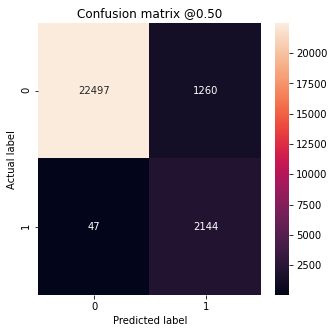

In [70]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# LSTM

In [ ]:
test_predictions_baseline

array([[8.7518007e-02],
       [2.9799074e-02],
       [1.9789091e-01],
       ...,
       [6.7089772e-01],
       [2.1925569e-04],
       [5.8732624e-12]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

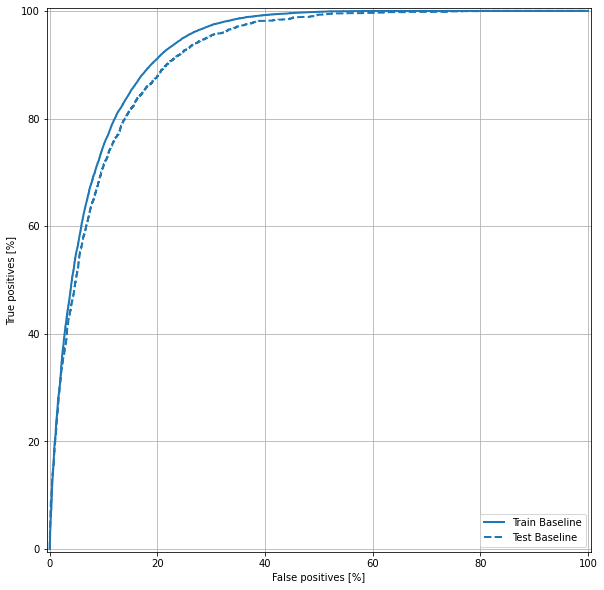

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/150
1348/1348 [==============================] - 11s 5ms/step - loss: 0.4524 - tp: 20823.4774 - fp: 9385.1119 - tn: 35981.6612 - fn: 2957.6783 - accuracy: 0.8188 - precision: 0.6484 - recall: 0.8692 - auc: 0.8868 - val_loss: 0.3633 - val_tp: 4303.0000 - val_fp: 1077.0000 - val_tn: 3743.0000 - val_fn: 461.0000 - val_accuracy: 0.8395 - val_precision: 0.7998 - val_recall: 0.9032 - val_auc: 0.9112
Epoch 2/150
1348/1348 [==============================] - 6s 4ms/step - loss: 0.3597 - tp: 19170.1312 - fp: 4567.8006 - tn: 17080.1579 - fn: 2381.8391 - accuracy: 0.8410 - precision: 0.8092 - recall: 0.8907 - auc: 0.9129 - val_loss: 0.3610 - val_tp: 4267.0000 - val_fp: 1053.0000 - val_tn: 3767.0000 - val_fn: 497.0000 - val_accuracy: 0.8383 - val_precision: 0.8021 - val_recall: 0.8957 - val_auc: 0.9120
Epoch 3/150
1348/1348 [==============================] - 5s 4ms/step - loss: 0.3643 - tp: 19131.1601 - fp: 4613.4359 - tn: 17065.3336 - fn: 2389.9993 - accuracy: 0.8381 - precision: 0.8057 - 

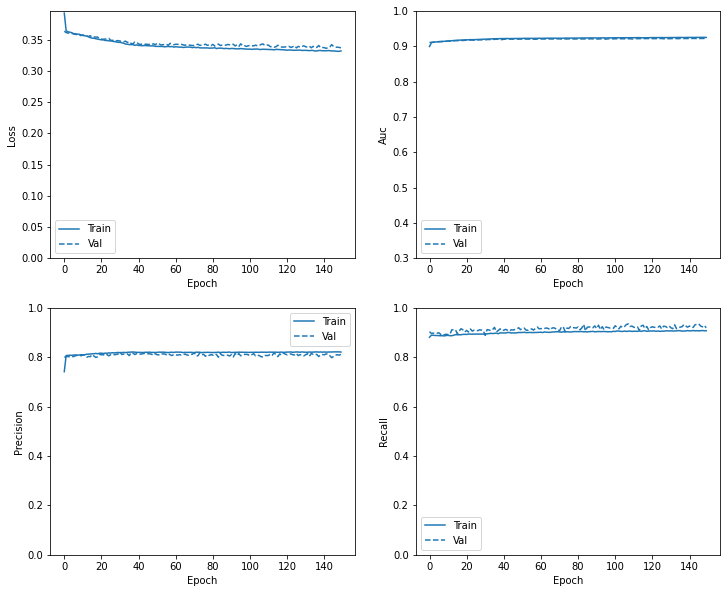

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.37810346484184265
tp :  1902.0
fp :  4757.0
tn :  19035.0
fn :  254.0
accuracy :  0.8068829774856567
precision :  0.28562846779823303
recall :  0.8821892142295837
auc :  0.9157237410545349

(True Negatives):  19035
 (False Positives):  4757
(False Negatives):  254
 (True Positives):  1902
Total Transactions:  2156


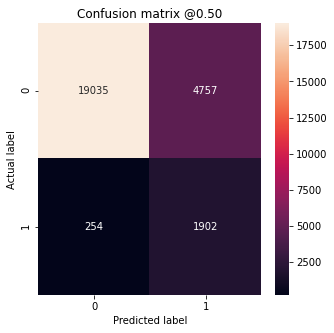

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

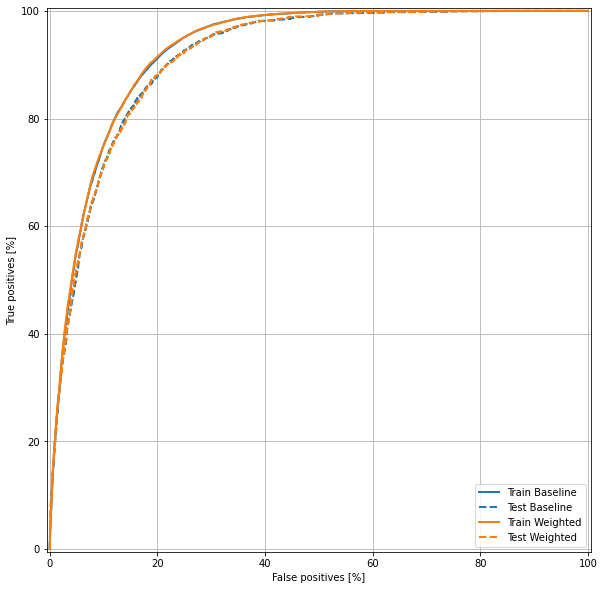

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(43100, 1, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(86200, 1, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.25087284  2.33998818  0.78402064 -1.04799922 -0.25398221]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.46875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1699.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/500
1699/1699 [==============================] - 7s 3ms/step - loss: 0.6997 - tp: 11427.4924 - fp: 8621.2859 - tn: 33470.3624 - fn: 18377.8218 - accuracy: 0.6291 - precision: 0.5086 - recall: 0.3360 - auc: 0.6398 - val_loss: 0.6146 - val_tp: 764.0000 - val_fp: 2298.0000 - val_tn: 3716.0000 - val_fn: 226.0000 - val_accuracy: 0.6396 - val_precision: 0.2495 - val_recall: 0.7717 - val_auc: 0.7476
Epoch 2/500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6335 - tp: 20702.2741 - fp: 10962.8412 - tn: 16333.6447 - fn: 6433.2024 - accuracy: 0.6798 - precision: 0.6538 - recall: 0.7582 - auc: 0.7077 - val_loss: 0.5963 - val_tp: 802.0000 - val_fp: 2435.0000 - val_tn: 3579.0000 - val_fn: 188.0000 - val_accuracy: 0.6255 - val_precision: 0.2478 - val_recall: 0.8101 - val_auc: 0.7481
Epoch 3/500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6190 - tp: 21433.7624 - fp: 11241.9694 - tn: 15932.3294 - fn: 5823.9012 - accuracy: 0.6859 - precision: 0.6557 - 

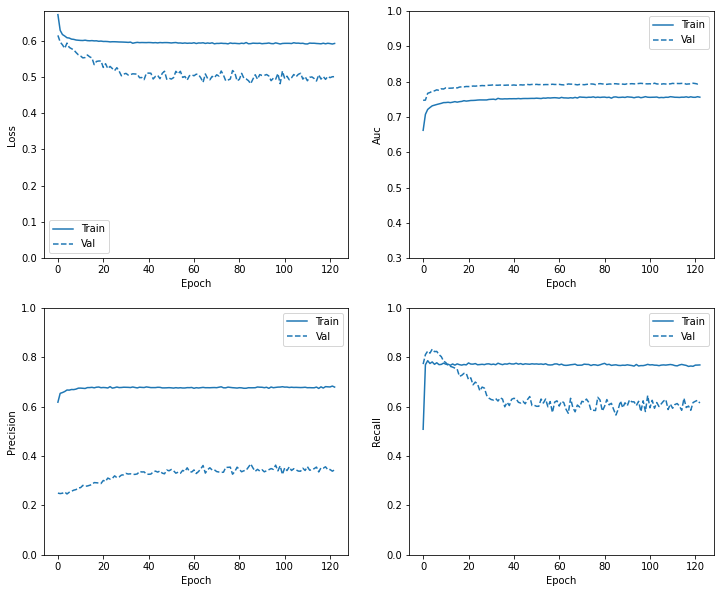

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6446671485900879
tp :  1814.0
fp :  5482.0
tn :  9573.0
fn :  596.0
accuracy :  0.6519896984100342
precision :  0.2486293911933899
recall :  0.7526971101760864
auc :  0.7677501440048218

(True Negatives):  9573
 (False Positives):  5482
(False Negatives):  596
 (True Positives):  1814
Total Transactions:  2410


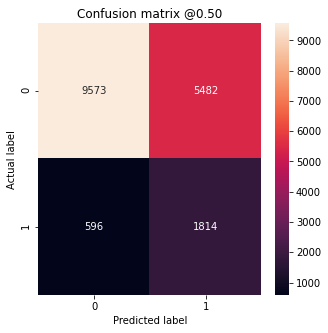

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

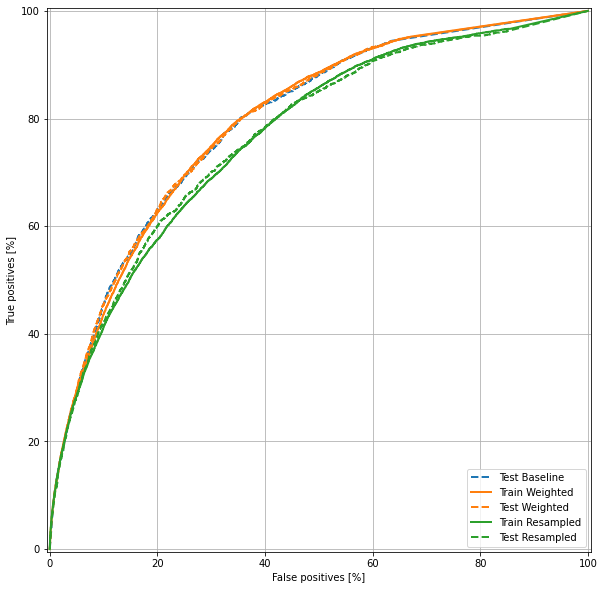

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# GRU

In [71]:
df1.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,69.0,69.0,69.0,131.0,0.0,131.0,69.0,69.0,0.0,0.0
4,4.0,0.0,131.0,131.0,70.0,69.0,70.0,61.0,69.0,130.0,69.0,69.0,0.0,0.0


In [72]:
df_test.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,79.0,79.0,79.0,121.0,0.0,121.0,79.0,79.0,0.0,0.0
4,4.0,0.0,121.0,121.0,82.0,79.0,82.0,39.0,79.0,118.0,80.0,80.0,0.0,0.0


In [73]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [74]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

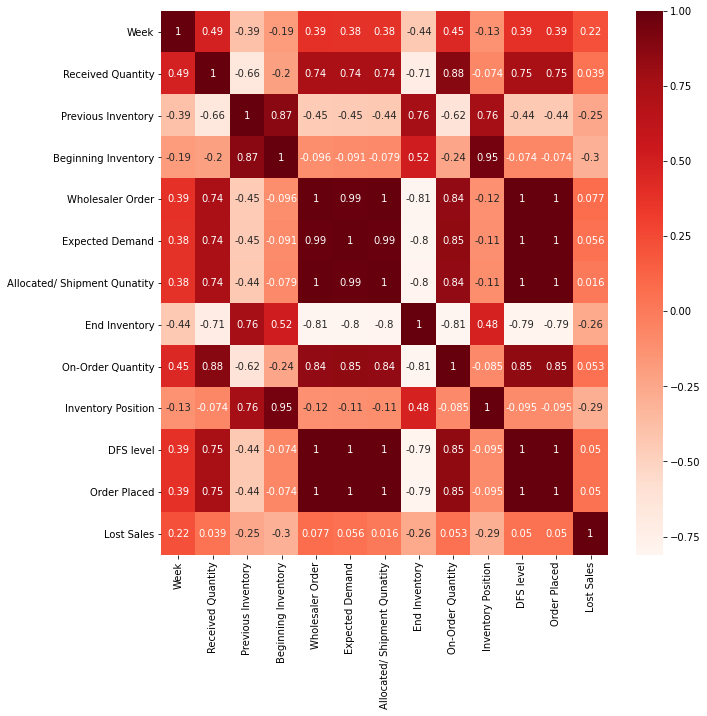

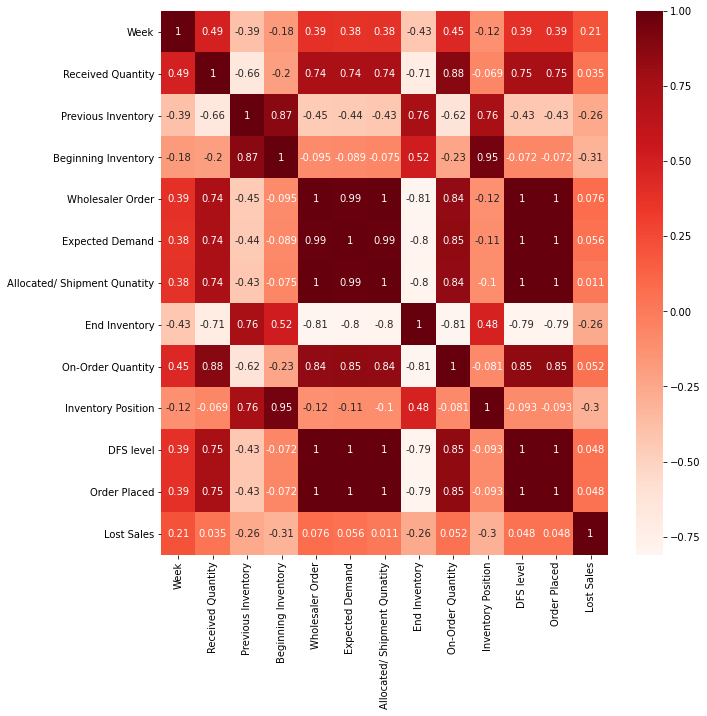

In [75]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [76]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [77]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )


In [78]:
X_train.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,End Inventory,On-Order Quantity,Inventory Position,Lost Sales
0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
2,2.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
3,3.0,0.0,200.0,200.0,69.0,131.0,0.0,131.0,0.0
4,4.0,0.0,131.0,131.0,70.0,61.0,69.0,130.0,0.0


In [79]:
X_train.shape

(104052, 9)

In [80]:
X_test.shape

(25948, 9)

- Correlation


In [81]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8145 (7.83% of total)



In [82]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 25948
    Positive: 2191 (8.44% of total)



In [ ]:
!pip install imbalanced-learn

In [83]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [84]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [85]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95907, 1: 8145})


Counter({0: 23757, 1: 2191})

OVER and Under Sampling pipeline

OVER SAMPLING

In [86]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95907, 1: 38362})


UNDER SAMPLING

In [87]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38362, 1: 38362})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [88]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

,0
76714,1
76715,1
76716,1
76717,1
76718,1
76719,1
76720,1
76721,1
76722,1
76723,1


In [89]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

,0,1,2,3,4,5,6,7,8
76694,35.000000,72.000000,0.000000,72.000000,78.000000,0.000000,76.000000,76.000000,6.000000
76695,31.000000,74.000000,1.000000,75.000000,75.493248,0.000000,73.506752,73.506752,0.493248
76696,43.748837,77.000000,0.000000,77.000000,78.748837,0.000000,81.000000,81.000000,1.748837
76697,35.000000,76.000000,2.000000,78.000000,78.444211,0.000000,77.000000,77.000000,0.444211
76698,47.401922,78.000000,0.000000,78.000000,78.000000,0.000000,78.000000,78.000000,0.000000
76699,41.000000,76.000000,0.000000,76.000000,77.000000,0.000000,76.000000,76.000000,1.000000
76700,43.000000,76.000000,0.000000,76.000000,78.000000,0.000000,78.000000,78.000000,2.000000
76701,26.644421,77.000000,5.000000,82.000000,77.644421,4.355579,75.644421,80.000000,0.000000
76702,41.986727,74.000000,0.000000,74.000000,72.013273,1.986727,77.000000,78.986727,0.000000
76703,42.000000,79.884568,0.000000,79.884568,77.000000,2.884568,78.000000,80.884568,0.000000


In [90]:
X_train.shape

(76724, 9)

In [91]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76724
    Positive: 38362 (50.00% of total)



In [92]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [93]:
train_df.shape

(57543, 9)

In [94]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 57543
    Positive: 28795 (50.04% of total)



In [95]:
a=pd.DataFrame(bool_train_labels)
a.shape

(57543, 1)

In [96]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (57543,)
Validation labels shape: (19181,)
Test labels shape: (25948,)
Training features shape: (57543, 9)
Validation features shape: (19181, 9)
Test features shape: (25948, 9)


In [97]:
from sklearn.decomposition import PCA

In [98]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [99]:
var_ratio

{2: 0.7860208270524791,
 3: 0.8759210933775955,
 4: 0.9452518200002762,
 5: 0.9789873612953685,
 6: 0.991409715745506,
 7: 0.9999980764265658,
 8: 0.9999999911034004,
 9: 0.9999999999999999}

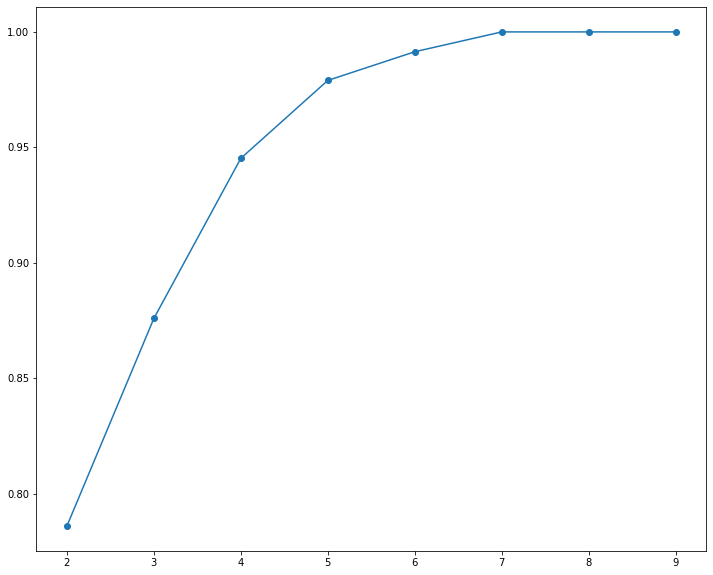

In [100]:
pd.Series(var_ratio).plot(marker="o")

In [101]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-0.96774561, -0.00867225, -1.21552769,  0.40683145,  0.05996677,
        -0.12568762],
       [ 0.23665905, -0.71362143, -0.31592763, -0.16686014,  0.02319572,
        -0.10010606],
       [-1.73219225,  0.90135047,  1.22599137,  0.58627399, -0.16616809,
         0.02281837],
       ...,
       [-1.25100248,  0.23916852, -0.58185846, -0.87127955,  0.24340219,
         0.07971969],
       [ 1.05010417, -1.18525374, -0.95333153,  1.32654397, -0.50335735,
        -0.09770729],
       [-1.91282193,  0.82921798,  1.45012607, -0.16708655, -0.02288484,
         0.0437092 ]])

In [102]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [103]:
train_features=pd.DataFrame(train_features)
train_features

,0,1,2,3,4,5
0,-0.967746,-0.008672,-1.215528,0.406831,0.059967,-0.125688
1,0.236659,-0.713621,-0.315928,-0.166860,0.023196,-0.100106
2,-1.732192,0.901350,1.225991,0.586274,-0.166168,0.022818
3,-1.243462,0.565923,-0.311364,-0.591005,0.169970,0.069101
4,-0.706114,-0.293064,-0.240411,-0.818116,0.345806,0.052949
...,...,...,...,...,...,...
57538,0.680060,-1.069083,-0.668254,0.661778,-0.390666,0.024013
57539,-0.693735,0.211680,-1.108866,0.330066,0.352763,-0.150466
57540,-1.251002,0.239169,-0.581858,-0.871280,0.243402,0.079720
57541,1.050104,-1.185254,-0.953332,1.326544,-0.503357,-0.097707


In [104]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [105]:
pos_df.shape

(28795, 6)

In [106]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [107]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [108]:
val_features.shape

(19181, 1, 6)

In [109]:
test_features.shape

(25948, 1, 6)

In [110]:
train_features.shape

(57543, 1, 6)

In [111]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout

In [112]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.GRU(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.GRU(20,activation ="tanh"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [113]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [114]:
model = make_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 30)             3420      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.predict(train_features[:10])

array([[0.7175402 ],
       [0.691924  ],
       [0.69777244],
       [0.7053726 ],
       [0.6945643 ],
       [0.711194  ],
       [0.69573224],
       [0.701387  ],
       [0.69965446],
       [0.69292647]], dtype=float32)

In [116]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7761


In [117]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.00163356])

In [118]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.5035963 ],
       [0.5001187 ],
       [0.5024558 ],
       [0.51103085],
       [0.51130927],
       [0.50623107],
       [0.4995823 ],
       [0.5117893 ],
       [0.49678403],
       [0.5091148 ]], dtype=float32)

In [119]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6963


In [120]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [121]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [122]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [123]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [124]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

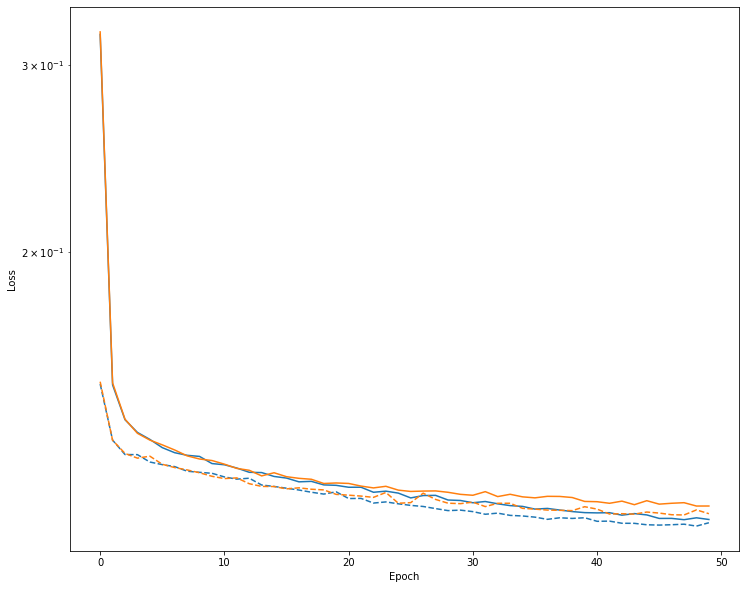

In [125]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [126]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
225/225 [==============================] - 7s 12ms/step - loss: 0.4814 - tp: 23578.8097 - fp: 3328.2522 - tn: 20797.9292 - fn: 530.3717 - accuracy: 0.9194 - precision: 0.8759 - recall: 0.9774 - auc: 0.9654 - val_loss: 0.1506 - val_tp: 9468.0000 - val_fp: 772.0000 - val_tn: 8842.0000 - val_fn: 99.0000 - val_accuracy: 0.9546 - val_precision: 0.9246 - val_recall: 0.9897 - val_auc: 0.9785
Epoch 2/150
225/225 [==============================] - 1s 6ms/step - loss: 0.1526 - tp: 14311.4115 - fp: 1083.3761 - tn: 13415.1239 - fn: 244.4513 - accuracy: 0.9552 - precision: 0.9309 - recall: 0.9838 - auc: 0.9775 - val_loss: 0.1327 - val_tp: 9463.0000 - val_fp: 704.0000 - val_tn: 8910.0000 - val_fn: 104.0000 - val_accuracy: 0.9579 - val_precision: 0.9308 - val_recall: 0.9891 - val_auc: 0.9826
Epoch 3/150
225/225 [==============================] - 1s 6ms/step - loss: 0.1417 - tp: 14257.7212 - fp: 1015.5664 - tn: 13536.0442 - fn: 245.0310 - accuracy: 0.9559 - precision: 0.9330 - recall: 0.98

In [127]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

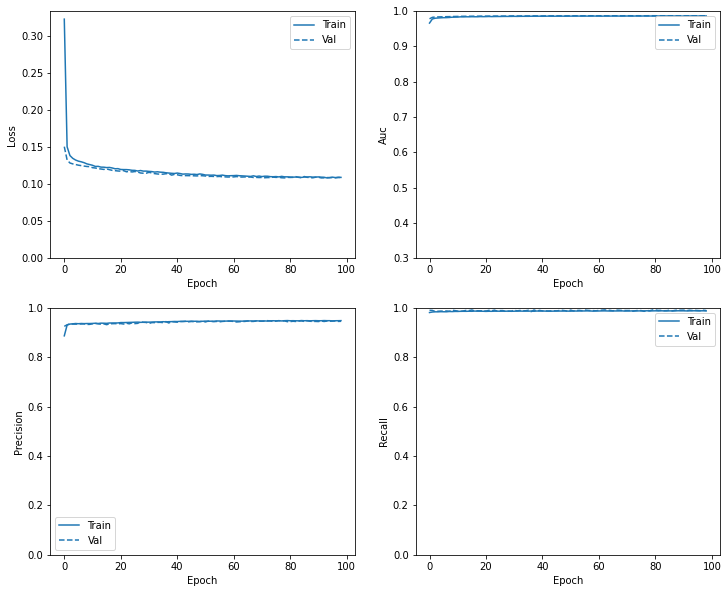

In [128]:
plot_metrics(baseline_history)

In [129]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [130]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.12743248045444489
tp :  2141.0
fp :  1132.0
tn :  22625.0
fn :  50.0
accuracy :  0.954447329044342
precision :  0.6541399359703064
recall :  0.9771793484687805
auc :  0.9871523380279541

(True Negatives):  22625
 (False Positives):  1132
(False Negatives):  50
 (True Positives):  2141
Total Transactions:  2191


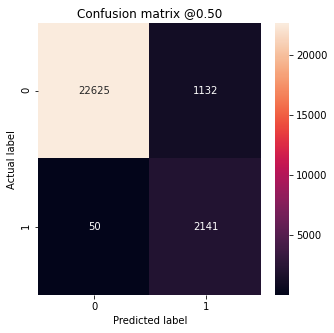

In [131]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# GRU

In [132]:
test_predictions_baseline

array([[8.8465724e-09],
       [3.1749934e-02],
       [3.5821974e-02],
       ...,
       [1.5986636e-05],
       [8.9478281e-06],
       [2.2675980e-05]], dtype=float32)

In [133]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

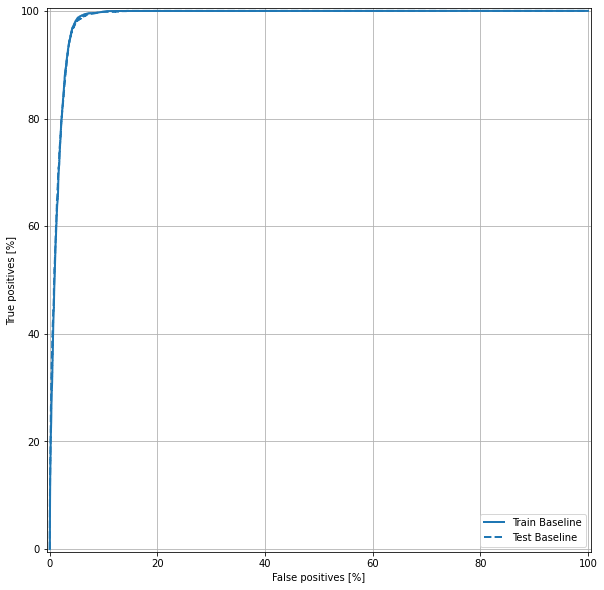

In [134]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/170
510/510 [==============================] - 5s 5ms/step - loss: 0.6061 - tp: 13864.7593 - fp: 5879.9922 - tn: 14075.8728 - fn: 6192.8356 - accuracy: 0.6963 - precision: 0.7023 - recall: 0.6850 - auc: 0.7659 - val_loss: 0.5366 - val_tp: 2778.0000 - val_fp: 1036.0000 - val_tn: 2562.0000 - val_fn: 870.0000 - val_accuracy: 0.7370 - val_precision: 0.7284 - val_recall: 0.7615 - val_auc: 0.8058
Epoch 2/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5487 - tp: 12068.2975 - fp: 4777.7730 - tn: 11596.0705 - fn: 4325.3190 - accuracy: 0.7198 - precision: 0.7145 - recall: 0.7350 - auc: 0.7933 - val_loss: 0.5307 - val_tp: 2666.0000 - val_fp: 926.0000 - val_tn: 2672.0000 - val_fn: 982.0000 - val_accuracy: 0.7367 - val_precision: 0.7422 - val_recall: 0.7308 - val_auc: 0.8100
Epoch 3/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5426 - tp: 12040.8924 - fp: 4730.6947 - tn: 11720.9237 - fn: 4274.9491 - accuracy: 0.7250 - precision: 0.7165 - recall: 

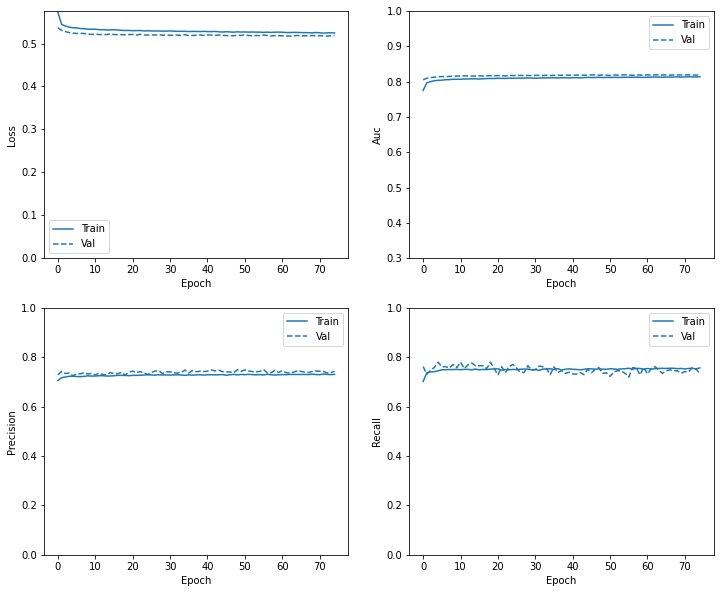

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5184459090232849
tp :  2681.0
fp :  930.0
tn :  2668.0
fn :  967.0
accuracy :  0.7382003664970398
precision :  0.7424536347389221
recall :  0.734923243522644
auc :  0.8197070360183716

(True Negatives):  2668
 (False Positives):  930
(False Negatives):  967
 (True Positives):  2681
Total Transactions:  3648


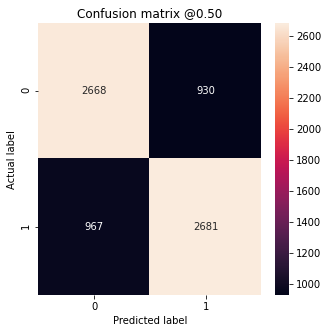

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

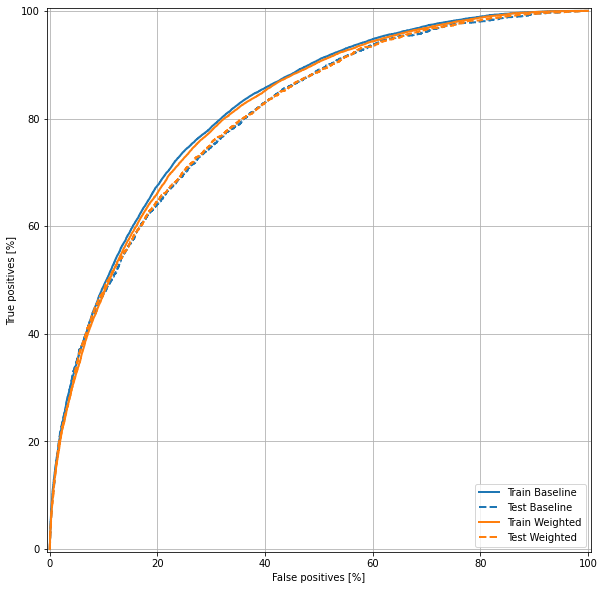

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(32628, 1, 5)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(65256, 1, 5)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[ 1.71830398 -1.13673723 -2.17685057  0.62384352  0.08632702]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

510.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/170
510/510 [==============================] - 6s 5ms/step - loss: 0.6074 - tp: 14156.6497 - fp: 6440.0117 - tn: 13526.1859 - fn: 5890.9022 - accuracy: 0.6877 - precision: 0.6831 - recall: 0.7048 - auc: 0.7628 - val_loss: 0.5354 - val_tp: 2790.0000 - val_fp: 1051.0000 - val_tn: 2547.0000 - val_fn: 858.0000 - val_accuracy: 0.7365 - val_precision: 0.7264 - val_recall: 0.7648 - val_auc: 0.8054
Epoch 2/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5484 - tp: 11934.6830 - fp: 4756.3014 - tn: 11650.7417 - fn: 4426.0235 - accuracy: 0.7175 - precision: 0.7127 - recall: 0.7268 - auc: 0.7932 - val_loss: 0.5289 - val_tp: 2829.0000 - val_fp: 1054.0000 - val_tn: 2544.0000 - val_fn: 819.0000 - val_accuracy: 0.7415 - val_precision: 0.7286 - val_recall: 0.7755 - val_auc: 0.8106
Epoch 3/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5406 - tp: 12027.2779 - fp: 4643.0528 - tn: 11808.1996 - fn: 4289.2192 - accuracy: 0.7271 - precision: 0.7202 - recall:

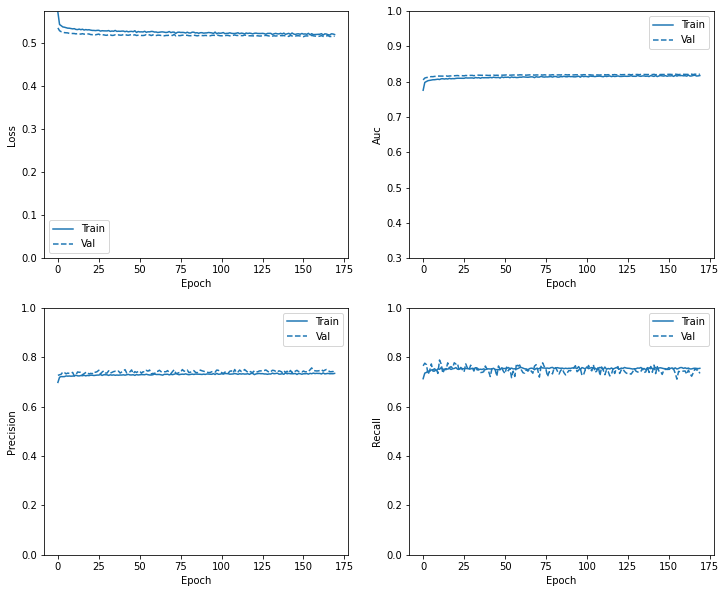

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/340
20/20 [==============================] - 5s 59ms/step - loss: 0.7008 - tp: 2889.5714 - fp: 1123.3810 - tn: 3173.1429 - fn: 1461.8095 - accuracy: 0.7026 - precision: 0.7211 - recall: 0.6663 - auc: 0.7899 - val_loss: 0.6765 - val_tp: 2654.0000 - val_fp: 1538.0000 - val_tn: 2060.0000 - val_fn: 994.0000 - val_accuracy: 0.6506 - val_precision: 0.6331 - val_recall: 0.7275 - val_auc: 0.7144
Epoch 2/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6712 - tp: 530.3810 - fp: 300.8095 - tn: 375.7619 - fn: 194.9524 - accuracy: 0.6415 - precision: 0.6332 - recall: 0.7234 - auc: 0.6948 - val_loss: 0.6484 - val_tp: 2741.0000 - val_fp: 1530.0000 - val_tn: 2068.0000 - val_fn: 907.0000 - val_accuracy: 0.6637 - val_precision: 0.6418 - val_recall: 0.7514 - val_auc: 0.7430
Epoch 3/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6436 - tp: 509.1905 - fp: 278.0476 - tn: 428.1429 - fn: 186.5238 - accuracy: 0.6618 - precision: 0.6349 - recall: 0.7350 - auc: 0.73

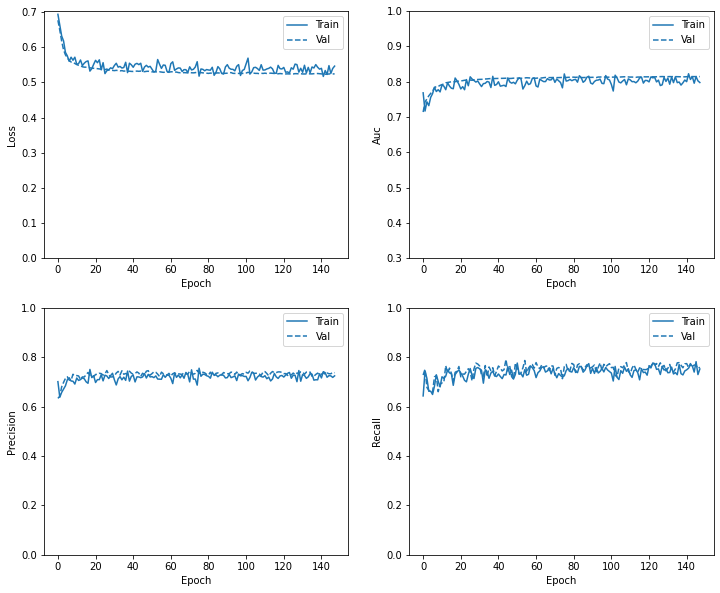

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)


loss :  0.524739682674408
tp :  2775.0
fp :  998.0
tn :  2600.0
fn :  873.0
accuracy :  0.7417885661125183
precision :  0.735489010810852
recall :  0.7606908082962036
auc :  0.8148261308670044

(True Negatives):  2600
 (False Positives):  998
(False Negatives):  873
 (True Positives):  2775
Total Transactions:  3648


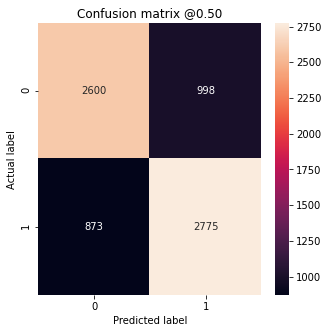

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

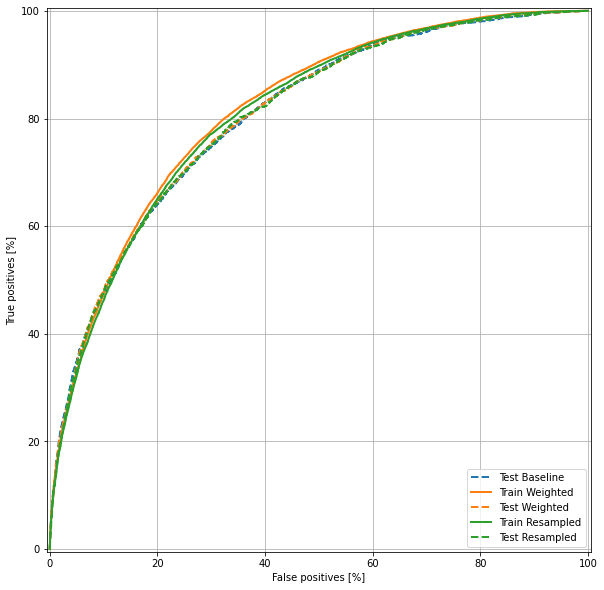

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# 1D CONV

In [135]:
df1.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,69.0,69.0,69.0,131.0,0.0,131.0,69.0,69.0,0.0,0.0
4,4.0,0.0,131.0,131.0,70.0,69.0,70.0,61.0,69.0,130.0,69.0,69.0,0.0,0.0


In [136]:
df_test.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,79.0,79.0,79.0,121.0,0.0,121.0,79.0,79.0,0.0,0.0
4,4.0,0.0,121.0,121.0,82.0,79.0,82.0,39.0,79.0,118.0,80.0,80.0,0.0,0.0


In [137]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [138]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

In [139]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [140]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )

In [141]:
X_train.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,End Inventory,On-Order Quantity,Inventory Position,Lost Sales
0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
2,2.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
3,3.0,0.0,200.0,200.0,69.0,131.0,0.0,131.0,0.0
4,4.0,0.0,131.0,131.0,70.0,61.0,69.0,130.0,0.0


In [142]:
X_train.shape

(104052, 9)

In [143]:
X_test.shape

(25948, 9)

- Correlation


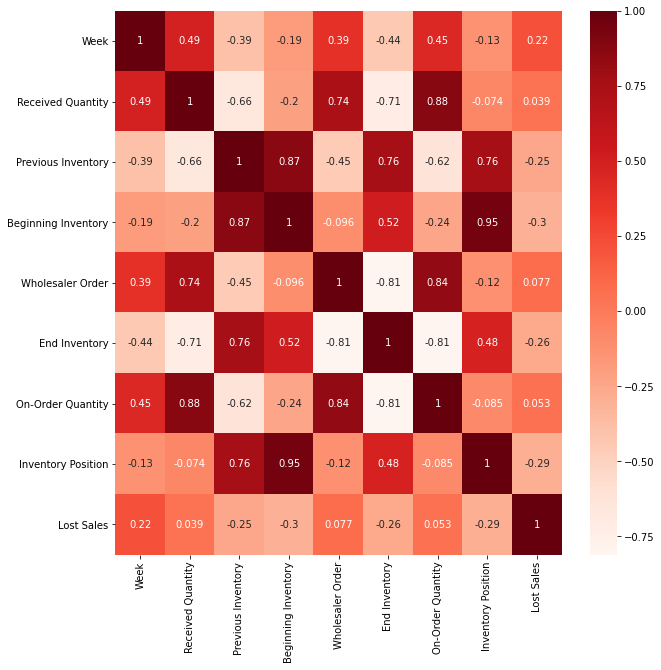

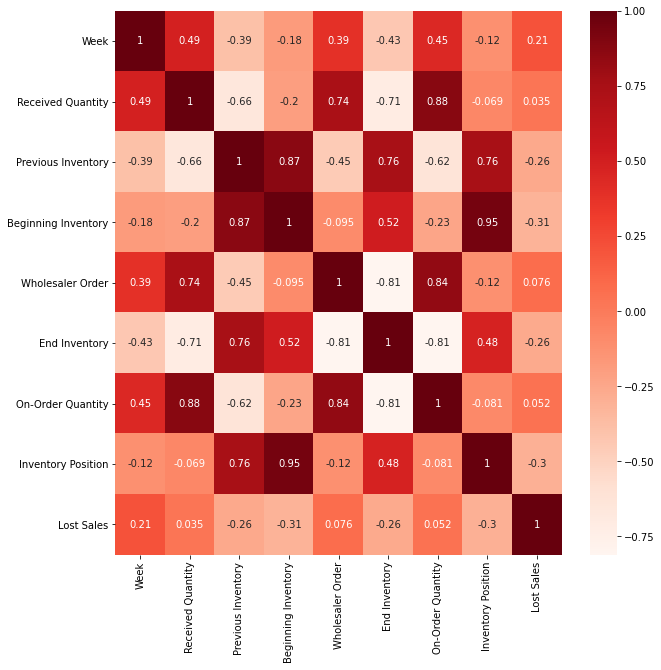

In [144]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [145]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8145 (7.83% of total)



In [146]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 25948
    Positive: 8145 (7.83% of total)



In [ ]:
!pip install imbalanced-learn

In [147]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [148]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [149]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95907, 1: 8145})


Counter({0: 23757, 1: 2191})

OVER and Under Sampling pipeline

OVER SAMPLING

In [150]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95907, 1: 38362})


UNDER SAMPLING

In [151]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38362, 1: 38362})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [152]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

,0
76714,1
76715,1
76716,1
76717,1
76718,1
76719,1
76720,1
76721,1
76722,1
76723,1


In [153]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

,0,1,2,3,4,5,6,7,8
76694,38.878175,76.121825,4.000000,80.121825,79.000000,1.121825,77.878175,79.000000,0.000000
76695,39.493110,78.000000,2.000000,80.000000,81.000000,0.000000,77.493110,77.493110,1.000000
76696,41.894328,73.000000,0.000000,73.000000,76.000000,0.000000,74.105672,74.105672,3.000000
76697,44.060607,78.000000,1.060607,79.060607,78.060607,1.000000,78.000000,79.000000,0.000000
76698,45.000000,79.307230,0.000000,79.307230,80.000000,0.000000,81.000000,81.000000,0.692770
76699,30.207759,69.207759,0.000000,69.207759,76.000000,0.000000,73.000000,73.000000,6.792241
76700,49.000000,79.000000,0.000000,79.000000,81.000000,0.000000,80.000000,80.000000,2.000000
76701,19.786811,75.000000,0.000000,75.000000,82.000000,0.000000,76.426377,76.426377,7.000000
76702,48.405616,75.000000,0.000000,75.000000,75.594384,0.000000,76.000000,76.000000,0.594384
76703,48.356498,75.000000,0.000000,75.000000,78.000000,0.000000,77.000000,77.000000,3.000000


In [154]:
X_train.shape

(76724, 9)

In [155]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76724
    Positive: 38362 (50.00% of total)



In [156]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [157]:
train_df.shape

(57543, 9)

In [158]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 57543
    Positive: 28743 (49.95% of total)



In [159]:
a=pd.DataFrame(bool_train_labels)
a.shape

(57543, 1)

In [160]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (57543,)
Validation labels shape: (19181,)
Test labels shape: (25948,)
Training features shape: (57543, 9)
Validation features shape: (19181, 9)
Test features shape: (25948, 9)


In [161]:
from sklearn.decomposition import PCA

In [162]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [163]:
var_ratio

{2: 0.7851084026371584,
 3: 0.8748321835527626,
 4: 0.944494811096225,
 5: 0.9787533975602913,
 6: 0.9913981266562718,
 7: 0.9999977243820247,
 8: 0.9999999709302646,
 9: 1.0}

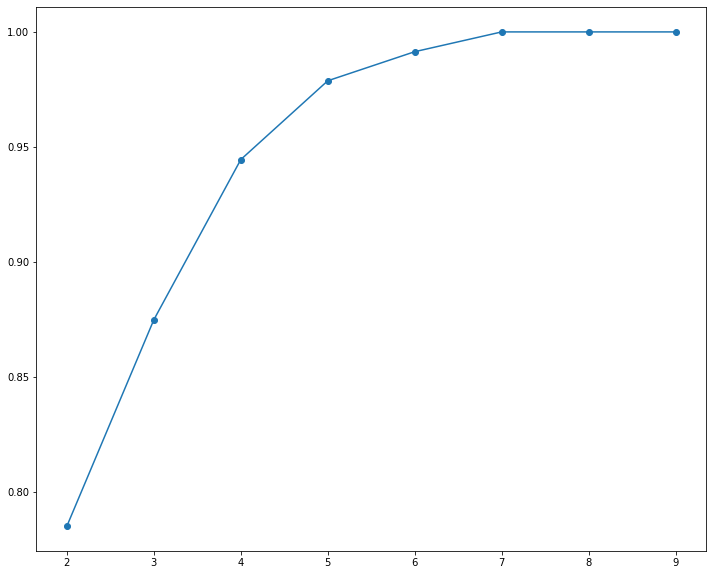

In [164]:
pd.Series(var_ratio).plot(marker="o")

In [165]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 1.89597972, -2.30390004,  1.31111892, -1.39021147, -0.44942362,
        -0.0216146 ],
       [ 0.80906417, -1.57334841, -0.6611027 ,  0.9815665 , -0.53228775,
         0.00498031],
       [ 0.50420232, -1.00869994, -0.57014309,  0.45456632, -0.24661095,
         0.02724032],
       ...,
       [-1.353045  ,  0.35517293, -0.11208159,  0.09800408,  0.01019297,
         0.05753452],
       [-1.65878676,  0.92980991,  0.94687106, -0.22463127,  0.01078143,
         0.0942889 ],
       [ 1.09010913, -0.30593417, -1.01518919,  1.04692407, -0.10858939,
         0.00262474]])

In [166]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [167]:
val_features

array([[ 1.13489734, -1.40965669, -0.80789866,  1.18837053, -0.67435284,
        -0.03094898],
       [ 0.93912033, -1.09017023, -0.50091517,  0.4805216 , -0.43973341,
        -0.17893852],
       [ 0.58036991, -1.01011974,  0.25575884, -0.83112592, -0.06290271,
         0.06915153],
       ...,
       [-0.94042333,  0.12605848, -1.03278248,  0.07822155,  0.18107989,
        -0.12473562],
       [-1.07944329, -0.07677239, -0.91196018, -0.04269655,  0.19239188,
        -0.15006289],
       [ 4.60951057, -4.44601307,  2.87234164, -1.63410585, -0.79284963,
        -0.08662134]])

In [168]:
test_features

array([[ 4.54761369,  8.34621776, -2.95970024, -0.95113012, -1.38952369,
        -0.53090211],
       [10.66443542,  2.30769901,  1.11152833, -0.66995519, -0.7737541 ,
         0.47801722],
       [10.64402552,  2.30539478,  1.14558682, -0.72961414, -0.76274763,
         0.47896818],
       ...,
       [-0.78268927, -0.48486747,  0.04413344, -1.25634737,  0.2234979 ,
         0.0491529 ],
       [-0.82079125, -0.50899036,  0.0829955 , -1.3042714 ,  0.26040632,
        -0.05973033],
       [-1.02773028, -0.55552012,  0.09739258, -1.25849043,  0.52111565,
        -0.09907578]])

In [169]:
train_features=pd.DataFrame(train_features)
train_features

,0,1,2,3,4,5
0,1.895980,-2.303900,1.311119,-1.390211,-0.449424,-0.021615
1,0.809064,-1.573348,-0.661103,0.981567,-0.532288,0.004980
2,0.504202,-1.008700,-0.570143,0.454566,-0.246611,0.027240
3,-0.707560,0.459579,-1.419001,0.534969,0.030346,-0.186819
4,-0.505124,-0.657660,-0.171944,-0.682010,0.168898,-0.052765
...,...,...,...,...,...,...
57538,-1.345876,1.031435,0.446521,0.624786,-0.123130,-0.003120
57539,-1.855934,1.282343,1.805646,0.936257,-0.240787,-0.115911
57540,-1.353045,0.355173,-0.112082,0.098004,0.010193,0.057535
57541,-1.658787,0.929810,0.946871,-0.224631,0.010781,0.094289


In [170]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [171]:
pos_df.shape

(28743, 6)

In [172]:
test_features.shape

(25948, 6)

In [173]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))

val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [174]:
train_features = train_features.reshape(train_features.shape[0],train_features.shape[2],1)
test_features = test_features.reshape(test_features.shape[0],test_features.shape[2],1)
val_features = val_features.reshape(val_features.shape[0],val_features.shape[2],1)

In [175]:
import keras 
from keras.models import Model 
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [176]:
input_shape=(train_features.shape[1], 1)

In [177]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Conv1D(64,kernel_size=3,padding = "same", activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="tanh"),
      Dropout(0.2),
      Dense(32, activation="tanh"),
      Dropout(0.2),
      Dense(16, activation="relu"),
      Dropout(0.2),

#       model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(64, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu"))

# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(6,activation="relu"),
#       keras.layers.Dense(4,activation="relu"),
#       keras.layers.Dense(2,activation="sigmoid"),
#       keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [178]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [179]:
model = make_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             192       
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)              

In [180]:
model.predict(train_features[:10])

array([[0.8413652 ],
       [0.8012439 ],
       [0.79694605],
       [0.8037893 ],
       [0.79800147],
       [0.7851095 ],
       [0.8153657 ],
       [0.82616913],
       [0.80739886],
       [0.8137914 ]], dtype=float32)

In [181]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9405


In [182]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00198113])

In [183]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.48162937],
       [0.48246902],
       [0.49049932],
       [0.50324976],
       [0.49744254],
       [0.48709247],
       [0.49305418],
       [0.48706314],
       [0.49724776],
       [0.48748317]], dtype=float32)

In [184]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6976


In [185]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [186]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [187]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [188]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [189]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

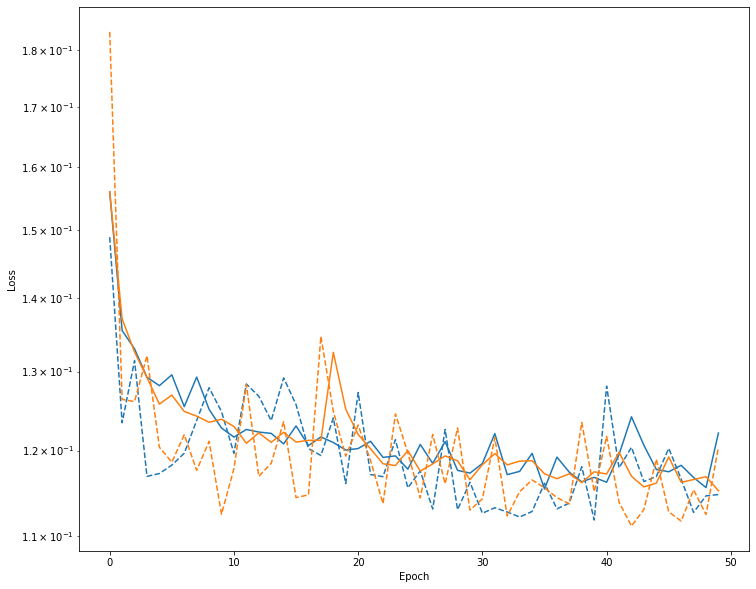

In [190]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [191]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/200
225/225 [==============================] - 6s 17ms/step - loss: 0.1897 - tp: 23561.1549 - fp: 1695.4115 - tn: 22399.4513 - fn: 579.3451 - accuracy: 0.9525 - precision: 0.9333 - recall: 0.9747 - auc: 0.9790 - val_loss: 0.1759 - val_tp: 9555.0000 - val_fp: 758.0000 - val_tn: 8804.0000 - val_fn: 64.0000 - val_accuracy: 0.9571 - val_precision: 0.9265 - val_recall: 0.9933 - val_auc: 0.9813
Epoch 2/200
225/225 [==============================] - 3s 13ms/step - loss: 0.1369 - tp: 14308.3496 - fp: 1043.9646 - tn: 13483.0575 - fn: 218.9912 - accuracy: 0.9565 - precision: 0.9317 - recall: 0.9851 - auc: 0.9809 - val_loss: 0.1288 - val_tp: 9510.0000 - val_fp: 689.0000 - val_tn: 8873.0000 - val_fn: 109.0000 - val_accuracy: 0.9584 - val_precision: 0.9324 - val_recall: 0.9887 - val_auc: 0.9828
Epoch 3/200
225/225 [==============================] - 3s 13ms/step - loss: 0.1359 - tp: 14266.6770 - fp: 1002.8805 - tn: 13574.7876 - fn: 210.0177 - accuracy: 0.9579 - precision: 0.9336 - recall: 0.

In [192]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

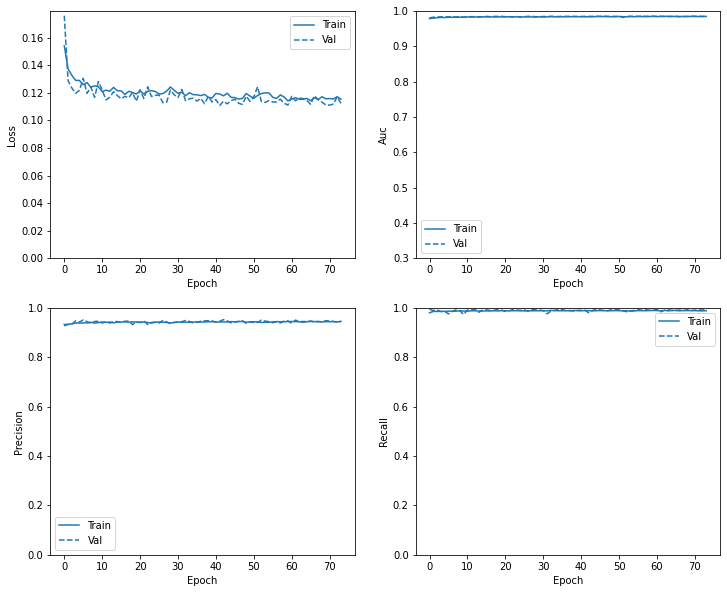

In [193]:
plot_metrics(baseline_history)

In [194]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [195]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.1268608570098877
tp :  2148.0
fp :  1231.0
tn :  22526.0
fn :  43.0
accuracy :  0.9509018063545227
precision :  0.6356910467147827
recall :  0.980374276638031
auc :  0.9868664741516113

(True Negatives):  22526
 (False Positives):  1231
(False Negatives):  43
 (True Positives):  2148
Total Transactions:  2191


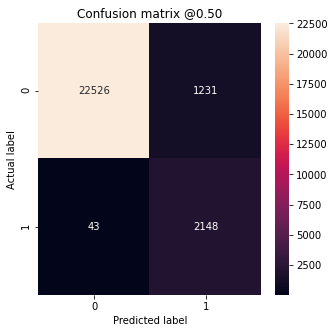

In [196]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# CONV 1D

In [197]:
test_predictions_baseline

array([[4.8236184e-06],
       [3.3795059e-02],
       [3.3796370e-02],
       ...,
       [1.2737590e-05],
       [9.3205035e-06],
       [1.5587679e-05]], dtype=float32)

In [198]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

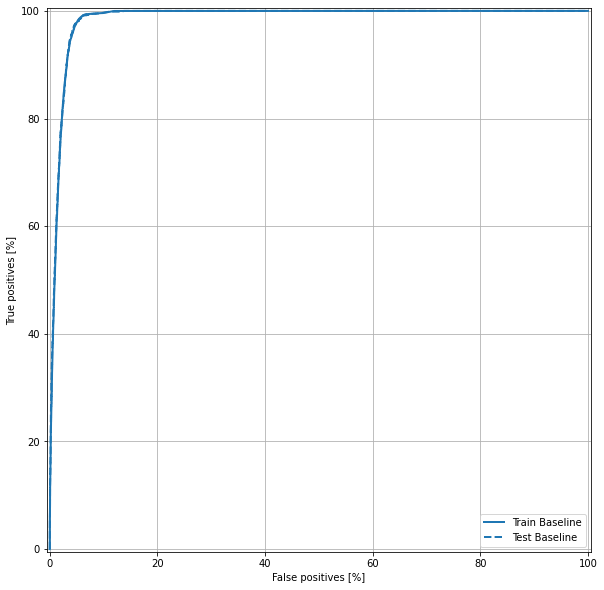

In [199]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/300
531/531 [==============================] - 8s 10ms/step - loss: 0.6911 - tp: 19345.9962 - fp: 10184.0883 - tn: 18241.9981 - fn: 8981.5113 - accuracy: 0.6669 - precision: 0.6583 - recall: 0.6902 - auc: 0.7391 - val_loss: 0.5689 - val_tp: 8803.0000 - val_fp: 4349.0000 - val_tn: 7070.0000 - val_fn: 2420.0000 - val_accuracy: 0.7010 - val_precision: 0.6693 - val_recall: 0.7844 - val_auc: 0.7772
Epoch 2/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5930 - tp: 12254.1692 - fp: 5807.2820 - tn: 11185.0019 - fn: 4865.1410 - accuracy: 0.6857 - precision: 0.6764 - recall: 0.7155 - auc: 0.7521 - val_loss: 0.5475 - val_tp: 8549.0000 - val_fp: 3578.0000 - val_tn: 7841.0000 - val_fn: 2674.0000 - val_accuracy: 0.7239 - val_precision: 0.7050 - val_recall: 0.7617 - val_auc: 0.7963
Epoch 3/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5774 - tp: 12434.4530 - fp: 5574.5883 - tn: 11464.8853 - fn: 4637.6673 - accuracy: 0.6994 - precision: 0.6898 - rec

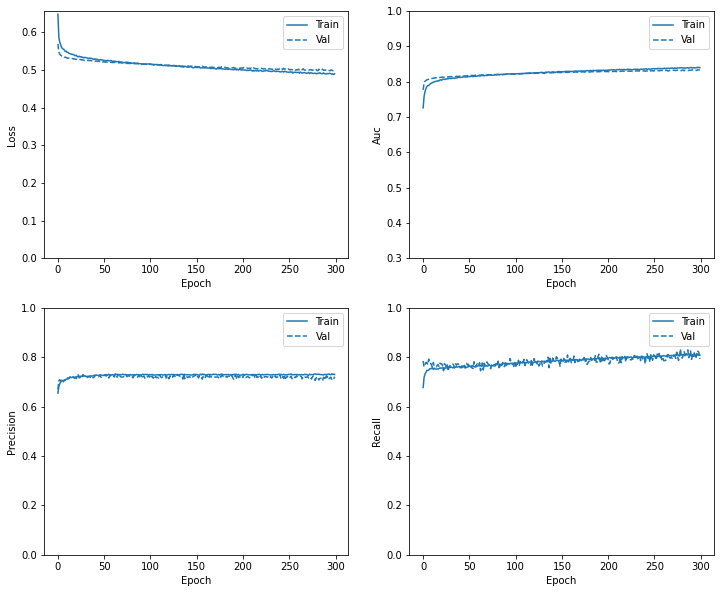

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.4981033205986023
tp :  8896.0
fp :  3444.0
tn :  7975.0
fn :  2327.0
accuracy :  0.7451196908950806
precision :  0.7209076285362244
recall :  0.7926579117774963
auc :  0.8337280750274658

(True Negatives):  7975
 (False Positives):  3444
(False Negatives):  2327
 (True Positives):  8896
Total Transactions:  11223


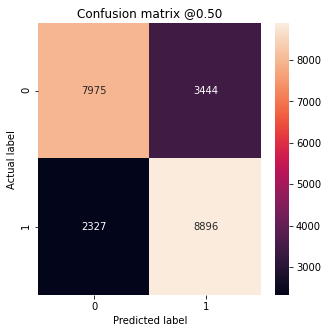

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

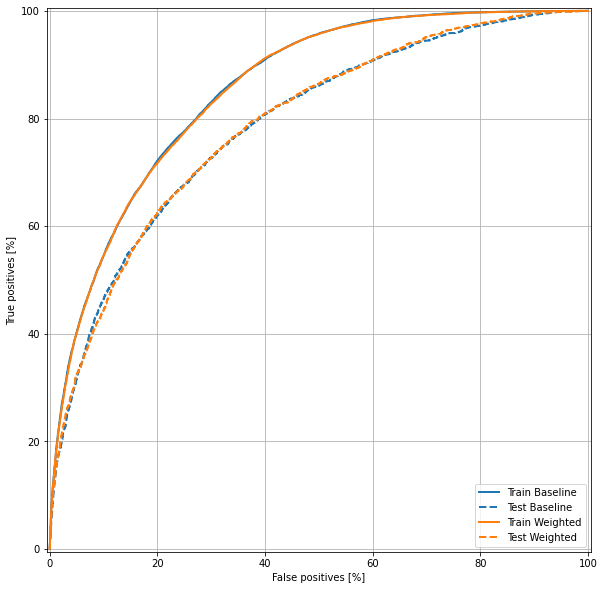

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(33864, 6, 1)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(67728, 6, 1)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-1.41463932]
 [-1.03407157]
 [-0.09692102]
 [ 0.93895215]
 [-0.24508446]
 [ 0.11068057]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6, 1), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5546875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

530.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/300
530/530 [==============================] - 8s 11ms/step - loss: 0.6947 - tp: 11682.1356 - fp: 10759.2222 - tn: 21390.7797 - fn: 7680.6215 - accuracy: 0.6443 - precision: 0.4883 - recall: 0.5927 - auc: 0.6998 - val_loss: 0.5705 - val_tp: 8869.0000 - val_fp: 4500.0000 - val_tn: 6919.0000 - val_fn: 2354.0000 - val_accuracy: 0.6973 - val_precision: 0.6634 - val_recall: 0.7903 - val_auc: 0.7745
Epoch 2/300
530/530 [==============================] - 5s 9ms/step - loss: 0.5924 - tp: 12275.5367 - fp: 5872.9115 - tn: 11091.1488 - fn: 4808.1620 - accuracy: 0.6860 - precision: 0.6778 - recall: 0.7194 - auc: 0.7520 - val_loss: 0.5478 - val_tp: 8535.0000 - val_fp: 3609.0000 - val_tn: 7810.0000 - val_fn: 2688.0000 - val_accuracy: 0.7219 - val_precision: 0.7028 - val_recall: 0.7605 - val_auc: 0.7955
Epoch 3/300
530/530 [==============================] - 4s 8ms/step - loss: 0.5757 - tp: 12430.2863 - fp: 5627.9831 - tn: 11375.9416 - fn: 4613.5480 - accuracy: 0.6988 - precision: 0.6896 - rec

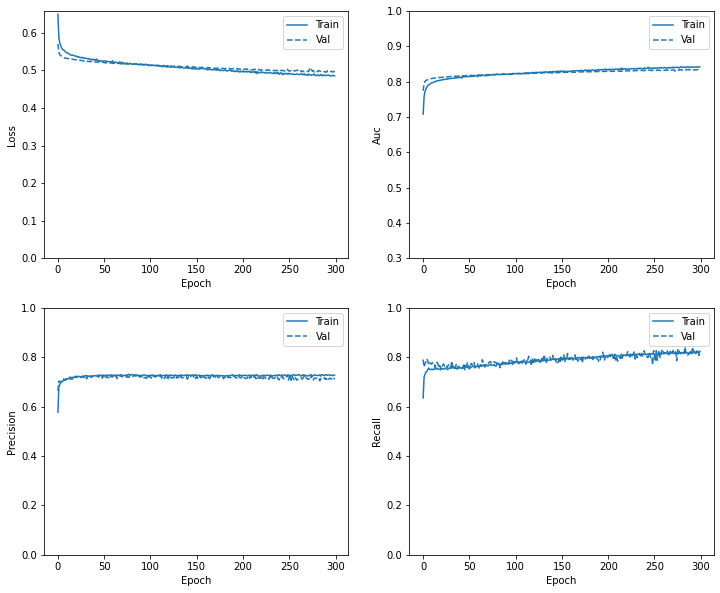

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/600
20/20 [==============================] - 4s 79ms/step - loss: 0.8108 - tp: 9618.0476 - fp: 4133.4286 - tn: 7994.5238 - fn: 2297.9048 - accuracy: 0.7328 - precision: 0.6995 - recall: 0.8076 - auc: 0.8206 - val_loss: 0.6972 - val_tp: 7965.0000 - val_fp: 8889.0000 - val_tn: 2530.0000 - val_fn: 3258.0000 - val_accuracy: 0.4635 - val_precision: 0.4726 - val_recall: 0.7097 - val_auc: 0.4552
Epoch 2/600
20/20 [==============================] - 1s 32ms/step - loss: 0.7430 - tp: 309.6667 - fp: 288.4762 - tn: 412.7619 - fn: 391.0000 - accuracy: 0.5152 - precision: 0.5273 - recall: 0.4430 - auc: 0.5329 - val_loss: 0.6902 - val_tp: 10341.0000 - val_fp: 10387.0000 - val_tn: 1032.0000 - val_fn: 882.0000 - val_accuracy: 0.5023 - val_precision: 0.4989 - val_recall: 0.9214 - val_auc: 0.5821
Epoch 3/600
20/20 [==============================] - 1s 33ms/step - loss: 0.7482 - tp: 355.6190 - fp: 276.6190 - tn: 386.8095 - fn: 382.8571 - accuracy: 0.5209 - precision: 0.5680 - recall: 0.4702 - auc:

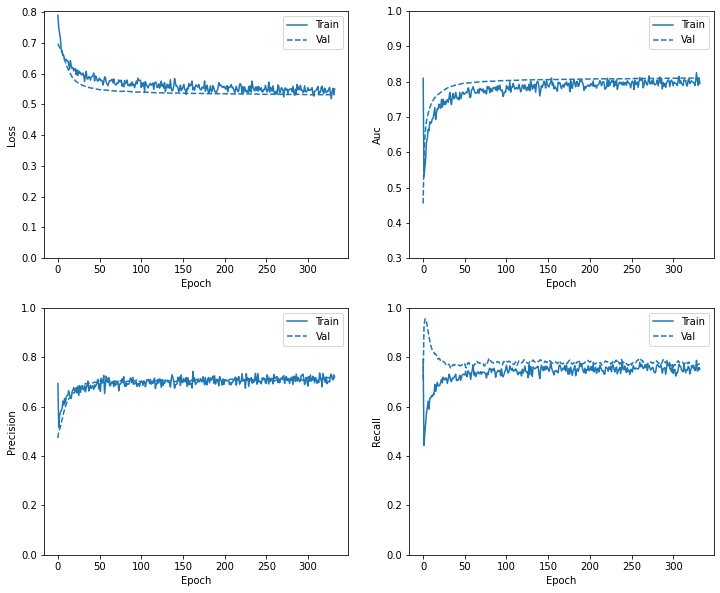

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5311693549156189
tp :  8702.0
fp :  3499.0
tn :  7920.0
fn :  2521.0
accuracy :  0.7341224551200867
precision :  0.7132202386856079
recall :  0.7753720283508301
auc :  0.810551643371582

(True Negatives):  7920
 (False Positives):  3499
(False Negatives):  2521
 (True Positives):  8702
Total Transactions:  11223


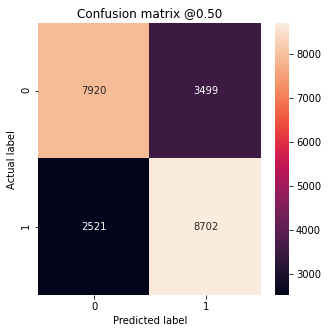

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

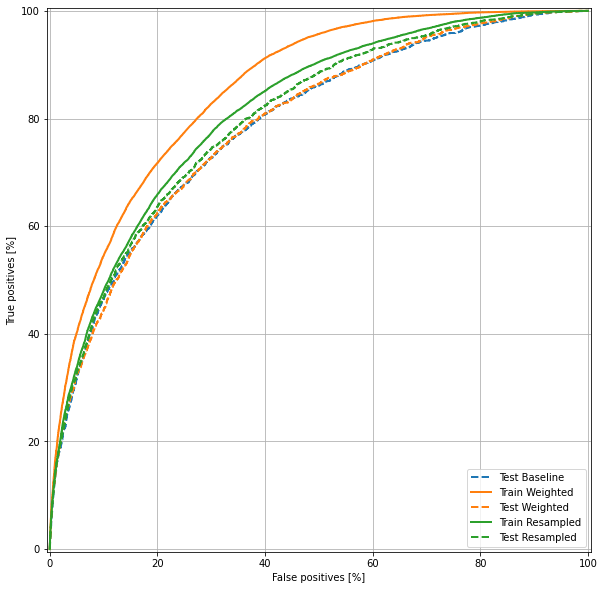

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# DNN


In [200]:
df1.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,69.0,69.0,69.0,131.0,0.0,131.0,69.0,69.0,0.0,0.0
4,4.0,0.0,131.0,131.0,70.0,69.0,70.0,61.0,69.0,130.0,69.0,69.0,0.0,0.0


In [201]:
df_test.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,Expected Demand,Allocated/ Shipment Qunatity,End Inventory,On-Order Quantity,Inventory Position,DFS level,Order Placed,Lost Sales,Stock Out
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
2,2.0,0.0,200.0,200.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,0.0,0.0,0.0
3,3.0,0.0,200.0,200.0,79.0,79.0,79.0,121.0,0.0,121.0,79.0,79.0,0.0,0.0
4,4.0,0.0,121.0,121.0,82.0,79.0,82.0,39.0,79.0,118.0,80.0,80.0,0.0,0.0


In [202]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [203]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

In [204]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [205]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )


In [206]:
X_train.head()

,Week,Received Quantity,Previous Inventory,Beginning Inventory,Wholesaler Order,End Inventory,On-Order Quantity,Inventory Position,Lost Sales
0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
1,1.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
2,2.0,0.0,200.0,200.0,0.0,200.0,0.0,200.0,0.0
3,3.0,0.0,200.0,200.0,69.0,131.0,0.0,131.0,0.0
4,4.0,0.0,131.0,131.0,70.0,61.0,69.0,130.0,0.0


In [207]:
X_train.shape

(104052, 9)

In [208]:
X_test.shape

(25948, 9)

- Correlation


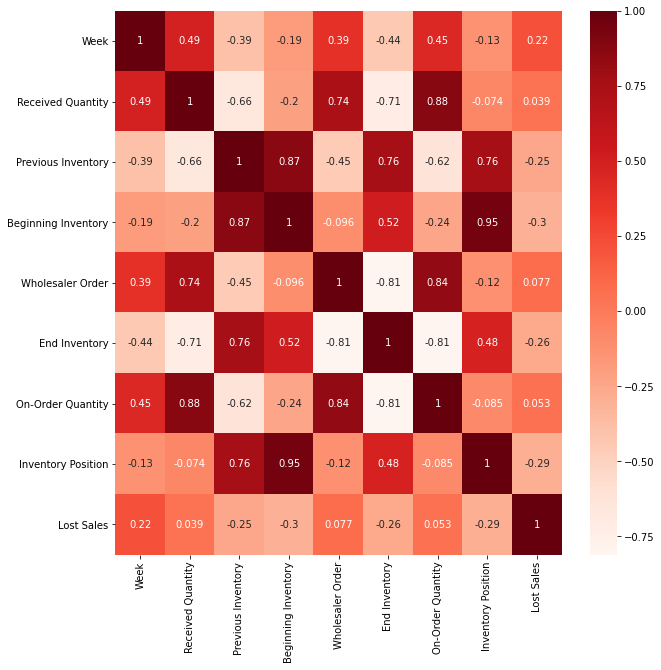

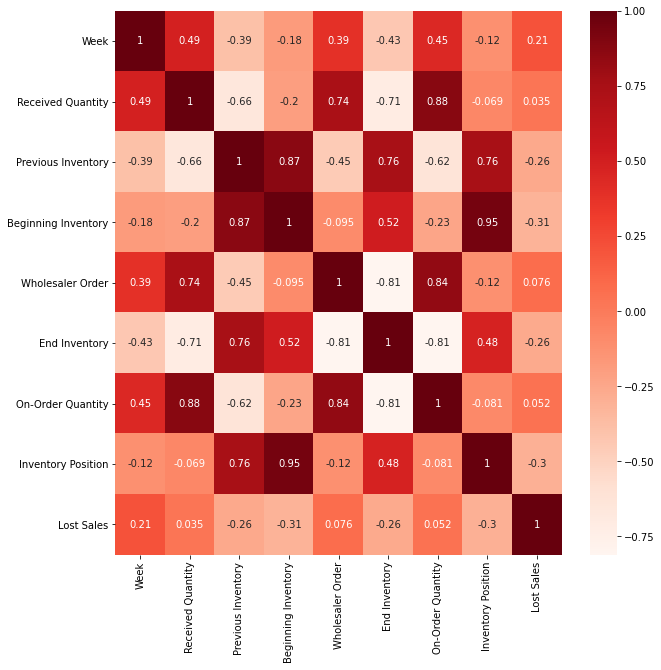

In [209]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [210]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8145 (7.83% of total)



In [211]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 25948
    Positive: 8145 (7.83% of total)



In [212]:
!pip install imbalanced-learn

In [213]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [214]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [215]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95907, 1: 8145})


Counter({0: 23757, 1: 2191})

OVER and Under Sampling pipeline

OVER SAMPLING

In [216]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.4)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95907, 1: 38362})


UNDER SAMPLING

In [217]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38362, 1: 38362})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [218]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

,0
76714,1
76715,1
76716,1
76717,1
76718,1
76719,1
76720,1
76721,1
76722,1
76723,1


In [219]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

,0,1,2,3,4,5,6,7,8
76694,43.000000,75.000000,0.000000,75.000000,77.658193,0.000000,76.000000,76.000000,2.658193
76695,31.000000,77.000000,0.000000,77.000000,79.000000,0.000000,76.470964,76.470964,2.000000
76696,45.000000,78.319132,0.680868,79.000000,84.000000,0.000000,78.319132,78.319132,5.000000
76697,19.069349,75.069349,4.861302,79.930651,74.069349,5.861302,75.138698,81.000000,0.000000
76698,48.054148,76.000000,0.000000,76.000000,81.000000,0.000000,78.000000,78.000000,5.000000
76699,47.304910,81.000000,0.652455,81.652455,83.652455,0.000000,80.652455,80.652455,2.000000
76700,43.000000,78.000000,0.000000,78.000000,80.000000,0.000000,78.000000,78.000000,2.000000
76701,38.000000,75.000000,0.000000,75.000000,80.000000,0.000000,78.000000,78.000000,5.000000
76702,38.467514,78.000000,0.000000,78.000000,79.000000,0.000000,79.000000,79.000000,1.000000
76703,28.017658,76.000000,0.000000,76.000000,76.000000,0.000000,76.982342,76.982342,0.000000


In [220]:
X_train.shape

(76724, 9)

In [221]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76724
    Positive: 38362 (50.00% of total)



In [222]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.2)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [223]:
train_df.shape

(61379, 9)

In [224]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 61379
    Positive: 30813 (50.20% of total)



In [225]:
a=pd.DataFrame(bool_train_labels)
a.shape

(61379, 1)

In [226]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (61379,)
Validation labels shape: (15345,)
Test labels shape: (25948,)
Training features shape: (61379, 9)
Validation features shape: (15345, 9)
Test features shape: (25948, 9)


In [227]:
from sklearn.decomposition import PCA

In [228]:
var_ratio={}
for n in range(2,9):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [229]:
var_ratio

{2: 0.7851067337954912,
 3: 0.875539125608636,
 4: 0.9451607421610623,
 5: 0.9787148897890032,
 6: 0.991162566934807,
 7: 0.9999977949763982,
 8: 1.0}

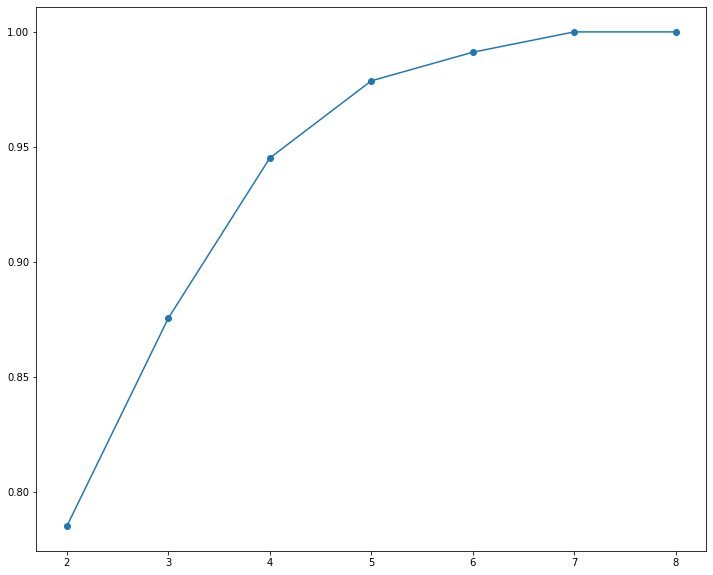

In [230]:
pd.Series(var_ratio).plot(marker="o")

In [231]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 1.98265171, -1.52389227,  0.12200035,  0.0854881 , -0.44983309,
         0.1933685 ],
       [-0.00729979, -1.20054286,  0.31677405, -0.95801716,  0.25837503,
        -0.0473739 ],
       [-0.46938583, -0.43672384, -0.64757551, -0.26166911, -0.31865676,
         0.178248  ],
       ...,
       [-1.54100592,  0.54762352,  0.41140771, -0.24959812,  0.07014198,
        -0.00404604],
       [-0.54830033, -0.2732564 , -0.32225416, -0.79234393,  0.03066453,
         0.11661421],
       [-1.66771953,  0.83367533,  1.06661613,  0.5573831 , -0.15582599,
         0.0349151 ]])

In [232]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [233]:
train_features=pd.DataFrame(train_features)
train_features

,0,1,2,3,4,5
0,1.982652,-1.523892,0.122000,0.085488,-0.449833,0.193368
1,-0.007300,-1.200543,0.316774,-0.958017,0.258375,-0.047374
2,-0.469386,-0.436724,-0.647576,-0.261669,-0.318657,0.178248
3,-0.572722,-0.513179,-0.652003,-0.071761,0.039928,-0.036277
4,-1.069627,0.759211,-0.209596,1.045612,-0.122868,-0.001539
...,...,...,...,...,...,...
61374,-1.511151,0.838951,0.552145,-0.412957,0.080727,0.072331
61375,-1.133524,0.701419,-0.395592,-0.492967,0.136358,0.186779
61376,-1.541006,0.547624,0.411408,-0.249598,0.070142,-0.004046
61377,-0.548300,-0.273256,-0.322254,-0.792344,0.030665,0.116614


In [234]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [235]:
pos_df.shape

(30813, 6)

In [236]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
        11, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(6,activation="relu"),
      keras.layers.Dense(4,activation="tanh"),
      keras.layers.Dense(2,activation="sigmoid"),
      keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.0005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [237]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [238]:
model = make_model()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 11)                77        
_________________________________________________________________
dropout_30 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 96        
_________________________________________________________________
dropout_31 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_32 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)               

In [239]:
model.predict(train_features[:10])

array([[0.3476301 ],
       [0.3500945 ],
       [0.34929436],
       [0.34992176],
       [0.3490561 ],
       [0.34993288],
       [0.34728232],
       [0.3098366 ],
       [0.34897172],
       [0.3492629 ]], dtype=float32)

In [240]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7384


In [241]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.0080484])

In [242]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.37567246],
       [0.37433645],
       [0.37402737],
       [0.37404886],
       [0.37400818],
       [0.37453926],
       [0.37515286],
       [0.3842666 ],
       [0.37393314],
       [0.37427422]], dtype=float32)

In [243]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7276


In [244]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [245]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [246]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [247]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [248]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

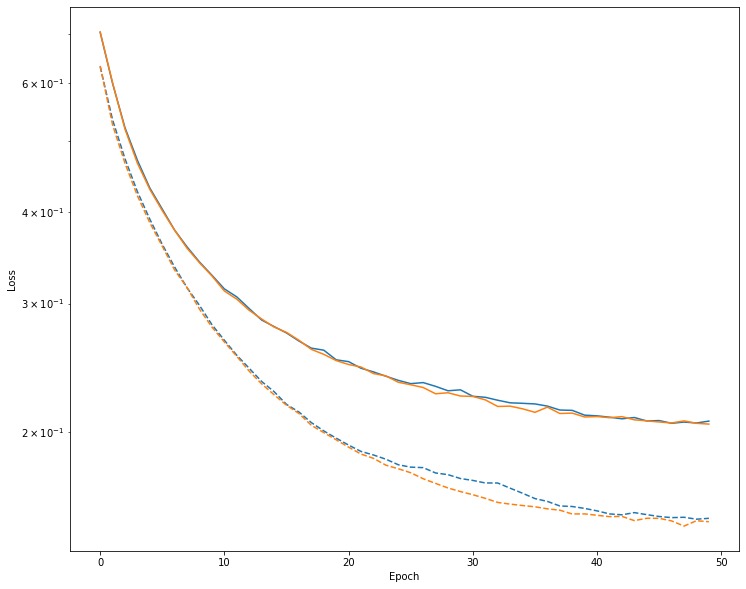

In [249]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [250]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(test_features, test_labels))

Epoch 1/200
240/240 [==============================] - 4s 8ms/step - loss: 0.7190 - tp: 8132.1784 - fp: 1185.3610 - tn: 22068.5643 - fn: 14933.3278 - accuracy: 0.6834 - precision: 0.8751 - recall: 0.4178 - auc: 0.7833 - val_loss: 0.5288 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 23757.0000 - val_fn: 2191.0000 - val_accuracy: 0.9156 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9441
Epoch 2/200
240/240 [==============================] - 1s 5ms/step - loss: 0.6317 - tp: 3714.2324 - fp: 1093.0124 - tn: 14293.4481 - fn: 11873.7386 - accuracy: 0.5645 - precision: 0.7454 - recall: 0.2013 - auc: 0.8286 - val_loss: 0.4346 - val_tp: 2142.0000 - val_fp: 1997.0000 - val_tn: 21760.0000 - val_fn: 49.0000 - val_accuracy: 0.9211 - val_precision: 0.5175 - val_recall: 0.9776 - val_auc: 0.9640
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.5437 - tp: 14387.0788 - fp: 2168.6971 - tn: 13200.1203 - fn: 1218.5353 - accuracy: 0.8842 - precision: 0.86

In [251]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

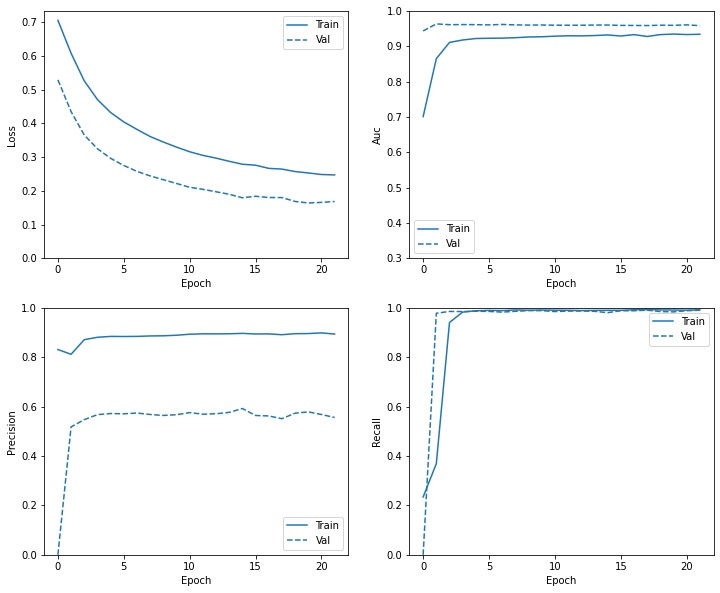

In [252]:
plot_metrics(baseline_history)

In [253]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [254]:
def plot_cm(labels, predictions, p=0.46):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.43463820219039917
tp :  2142.0
fp :  1997.0
tn :  21760.0
fn :  49.0
accuracy :  0.9211499691009521
precision :  0.5175163149833679
recall :  0.9776358008384705
auc :  0.9639794826507568

(True Negatives):  21654
 (False Positives):  2103
(False Negatives):  40
 (True Positives):  2151
Total Transactions:  2191


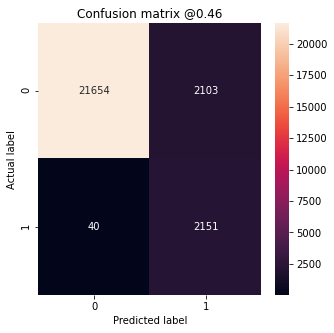

In [255]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# DNN

In [256]:
test_predictions_baseline

array([[0.31709498],
       [0.31732088],
       [0.31732178],
       ...,
       [0.35558993],
       [0.33930117],
       [0.34075022]], dtype=float32)

In [257]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

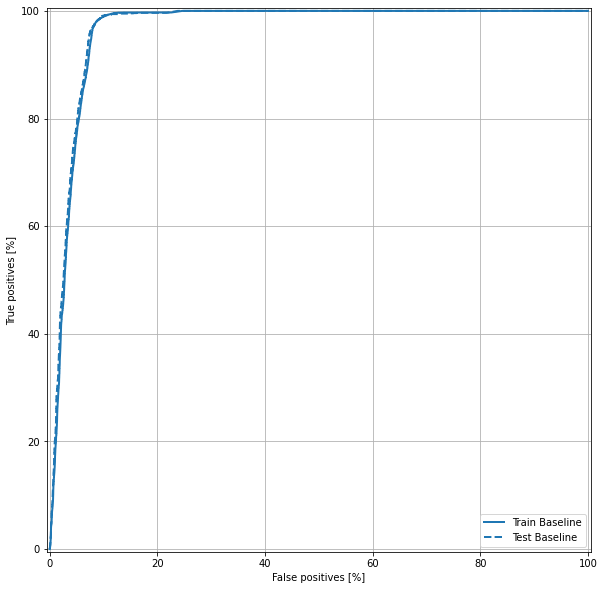

In [258]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [259]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [260]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/200
240/240 [==============================] - 4s 8ms/step - loss: 0.7191 - tp: 2760.4274 - fp: 2614.0622 - tn: 36545.2988 - fn: 15002.6432 - accuracy: 0.7135 - precision: 0.5135 - recall: 0.2170 - auc: 0.7960 - val_loss: 0.6241 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 7796.0000 - val_fn: 7549.0000 - val_accuracy: 0.5080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9431
Epoch 2/200
240/240 [==============================] - 1s 4ms/step - loss: 0.6255 - tp: 4356.8838 - fp: 1231.8672 - tn: 14214.6390 - fn: 11171.0415 - accuracy: 0.5777 - precision: 0.7476 - recall: 0.2299 - auc: 0.8357 - val_loss: 0.5276 - val_tp: 7442.0000 - val_fp: 810.0000 - val_tn: 6986.0000 - val_fn: 107.0000 - val_accuracy: 0.9402 - val_precision: 0.9018 - val_recall: 0.9858 - val_auc: 0.9514
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.5379 - tp: 14404.1328 - fp: 2315.4025 - tn: 13115.6846 - fn: 1139.2116 - accuracy: 0.8817 - precision: 0.8581

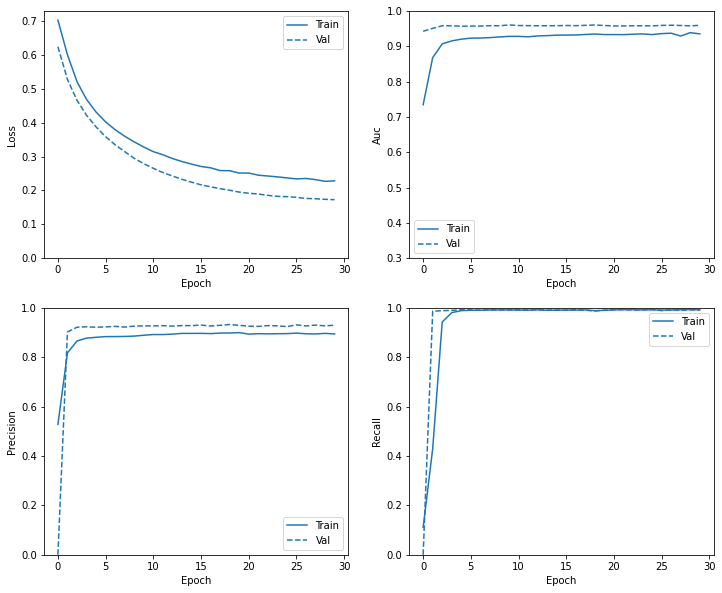

In [261]:
plot_metrics(weighted_history)

In [262]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.2791061997413635
tp :  7483.0
fp :  593.0
tn :  7203.0
fn :  66.0
accuracy :  0.9570544362068176
precision :  0.9265725612640381
recall :  0.9912571310997009
auc :  0.9610263109207153

(True Negatives):  7033
 (False Positives):  763
(False Negatives):  90
 (True Positives):  7459
Total Transactions:  7549


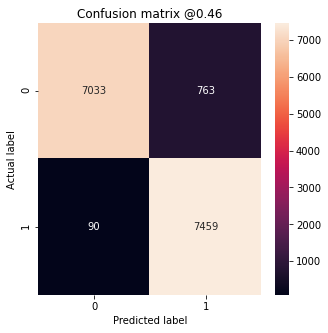

In [263]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_baseline)

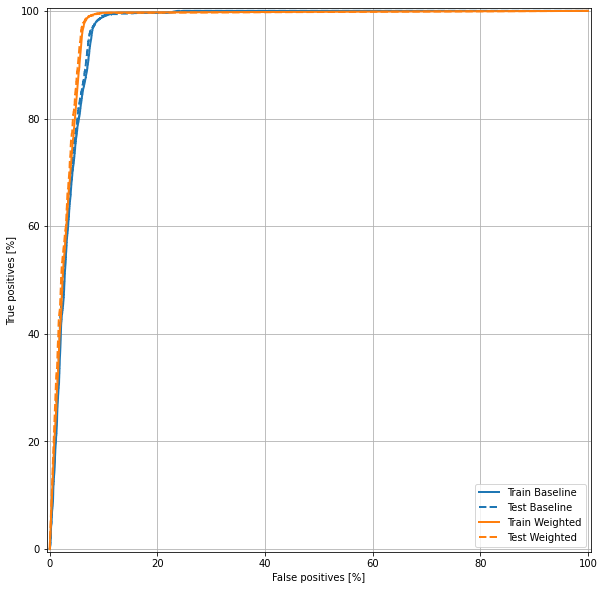

In [264]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [265]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [266]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(30566, 6)

In [267]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(61132, 6)

In [268]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [269]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.41907478  1.23109242  0.7294977   0.01009259 -0.03005419  0.12050689]

Label:  1


In [270]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [271]:
resampled_ds

<PrefetchDataset shapes: ((None, 6), (None,)), types: (tf.float64, tf.int64)>

In [272]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5234375


In [273]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

239.0

In [274]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/200
239/239 [==============================] - 4s 9ms/step - loss: 0.7186 - tp: 8113.7000 - fp: 1214.4208 - tn: 22035.7208 - fn: 14828.0917 - accuracy: 0.6837 - precision: 0.8720 - recall: 0.4186 - auc: 0.7831 - val_loss: 0.6282 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 7796.0000 - val_fn: 7549.0000 - val_accuracy: 0.5080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9406
Epoch 2/200
239/239 [==============================] - 1s 6ms/step - loss: 0.6257 - tp: 3997.4500 - fp: 1137.6542 - tn: 14316.8000 - fn: 11395.0292 - accuracy: 0.5738 - precision: 0.7398 - recall: 0.2132 - auc: 0.8357 - val_loss: 0.5273 - val_tp: 7429.0000 - val_fp: 758.0000 - val_tn: 7038.0000 - val_fn: 120.0000 - val_accuracy: 0.9428 - val_precision: 0.9074 - val_recall: 0.9841 - val_auc: 0.9559
Epoch 3/200
239/239 [==============================] - 1s 5ms/step - loss: 0.5368 - tp: 14180.7208 - fp: 2115.2917 - tn: 13297.4042 - fn: 1253.5167 - accuracy: 0.8848 - precision: 0.8687

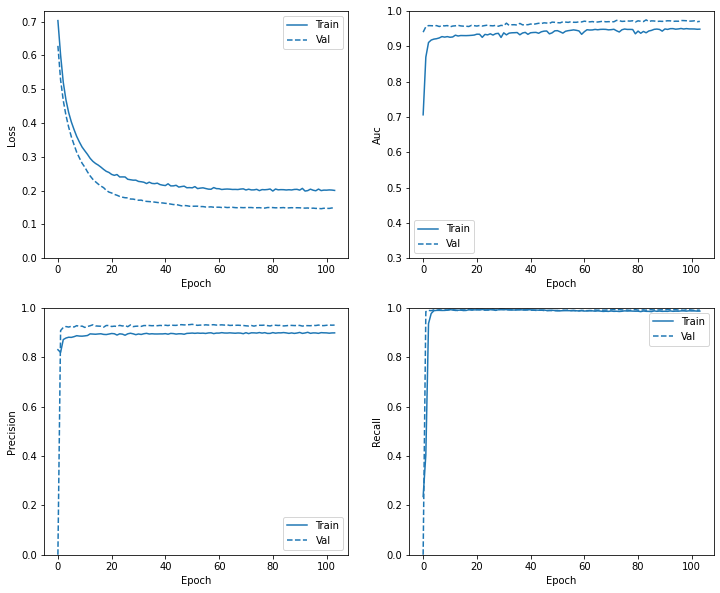

In [275]:
plot_metrics(resampled_history)

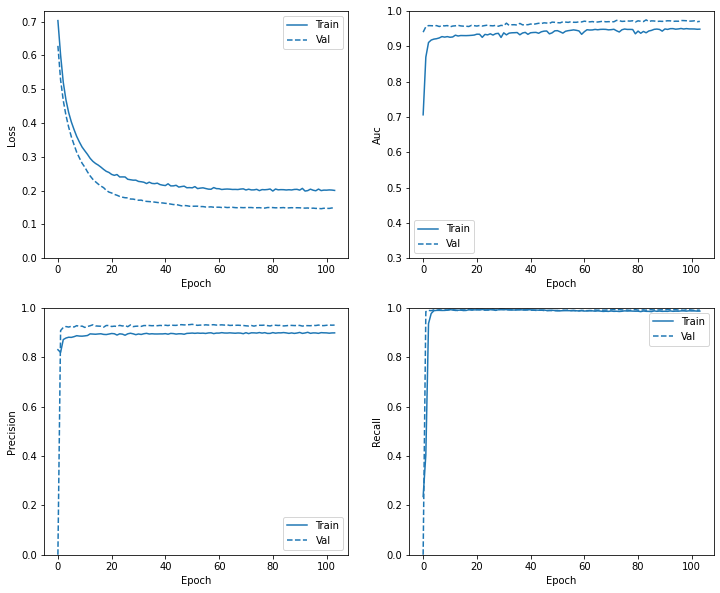

In [276]:
plot_metrics(resampled_history)

In [277]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.14137154817581177
tp :  2159.0
fp :  1576.0
tn :  22181.0
fn :  32.0
accuracy :  0.9380298852920532
precision :  0.5780454874038696
recall :  0.9853947758674622
auc :  0.9756584763526917

(True Negatives):  22141
 (False Positives):  1616
(False Negatives):  30
 (True Positives):  2161
Total Transactions:  2191


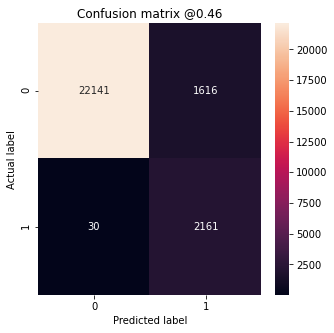

In [280]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

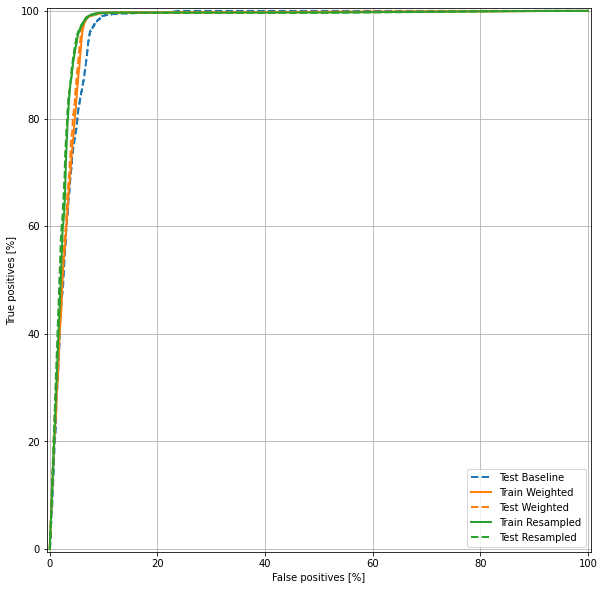

In [279]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')